**Name - Aditya Jain**

**Batch No. - DS2310**

**Assingment - Baseball Case Study**

In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
# import data...........
data = pd.read_excel("avocado.xlsx")
data.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 18249
No. of columns 14


In [4]:
data.columns

Index([  'Unnamed: 0',         'Date', 'AveragePrice', 'Total Volume',
                 4046,           4225,           4770,   'Total Bags',
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
               'year',       'region'],
      dtype='object')

In [5]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [6]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Statistical Analysis

**Before Going for statistical exploration of data, first check integrity of data & missing value**

# Data Integrity Check

**Since dataset is large, Let Check for any entry which is repeated or duplicated in dataset at same date.**

In [7]:
data.duplicated().sum() #this will check the duplicate data for all columns.

0

**Observation-:**

**Dataset doesnot contains Any duplicate entry.So Yes to go.**

# Missing Value Check

<Axes: >

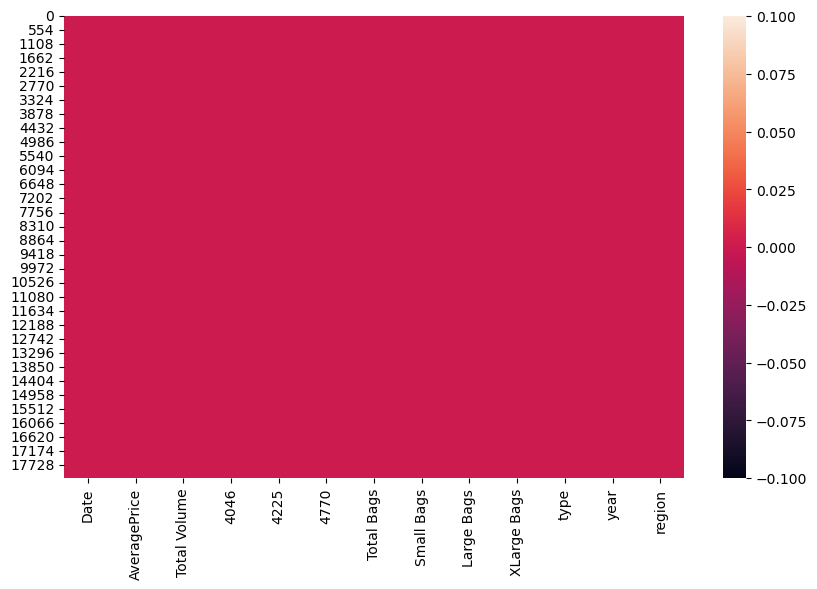

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [9]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

              Missing_values  %Missing values
Date                       0              0.0
AveragePrice               0              0.0
Total Volume               0              0.0
4046                       0              0.0
4225                       0              0.0
4770                       0              0.0
Total Bags                 0              0.0
Small Bags                 0              0.0
Large Bags                 0              0.0
XLarge Bags                0              0.0
type                       0              0.0
year                       0              0.0
region                     0              0.0


**There is no missing values in datasets**

# Datatype Check

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


**Observation-:**

- There are 13 features in data.
- Region has object datatype.
- Date by default data type is object which need to change to date time datatype.
- Other variable are float & int datatypes.

In [11]:
#Converting datatype of date column
data['Date']=pd.to_datetime(data.Date)

In [12]:
data['Date'].dtype

dtype('<M8[ns]')

# Statistical Matrix

<Axes: >

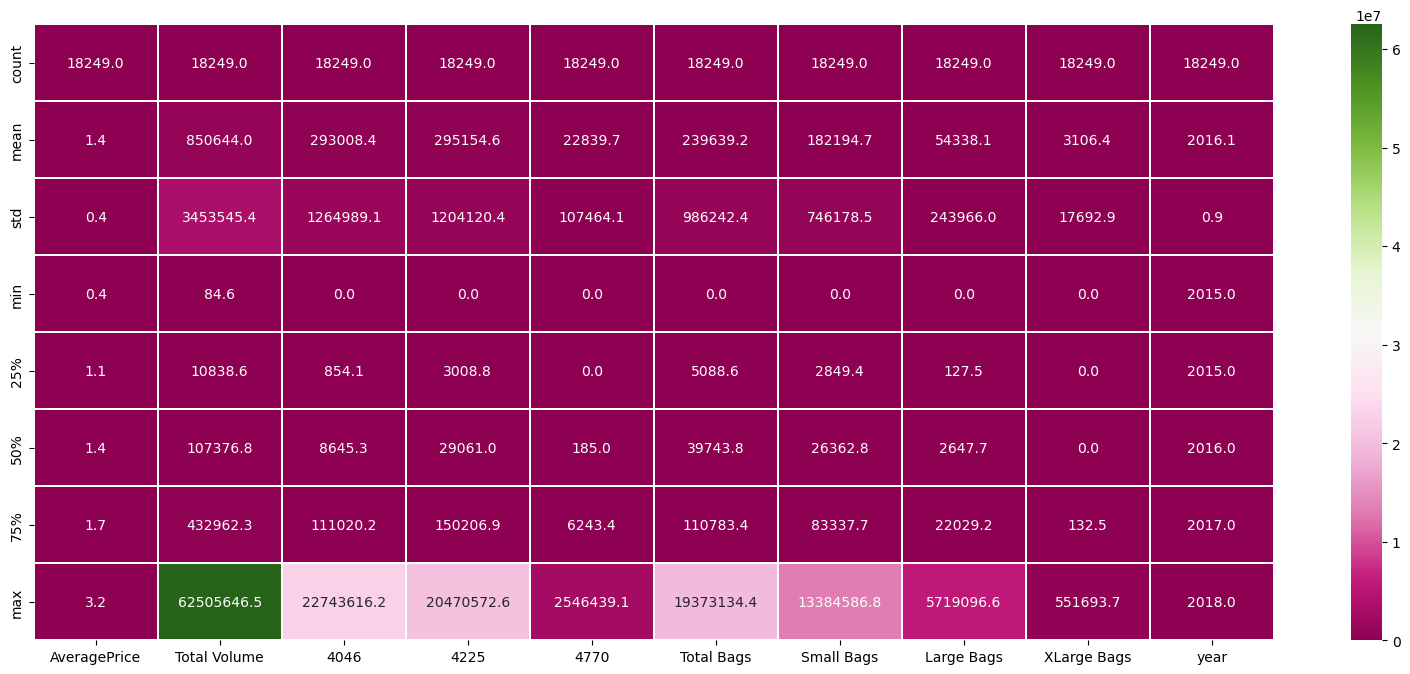

In [13]:
# visualizing the statistics of the column using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(data.describe(),linewidths = 0.1,fmt = '0.1f', annot = True, cmap ='PiYG')

In [14]:
data.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

**Observation-:**

- we can easily suspect that some of the features contains outliers after looking at 50% and max columns.
- For most of columns have minimum value of zero.
- almost in all column value of mean is greater than median. Data is Right skewed.
- For most of columns value of std. deviation is greater than mean i.e data is spread.

**Let's do some statistical Analysis. Start with find average price of avocado over the timeframe and according types.**

In [15]:
print("Minimum Price of Avocado",data.AveragePrice.min(),'USD')
print("Maximum Price of Avocado",data.AveragePrice.max(),'USD')
print("Average Price of Avocado",data.AveragePrice.mean(),'USD')

Minimum Price of Avocado 0.44 USD
Maximum Price of Avocado 3.25 USD
Average Price of Avocado 1.405978409775878 USD


**Avocado varies from 0.44 USD to 3.25 USD with average price of 1.4059 USD**

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

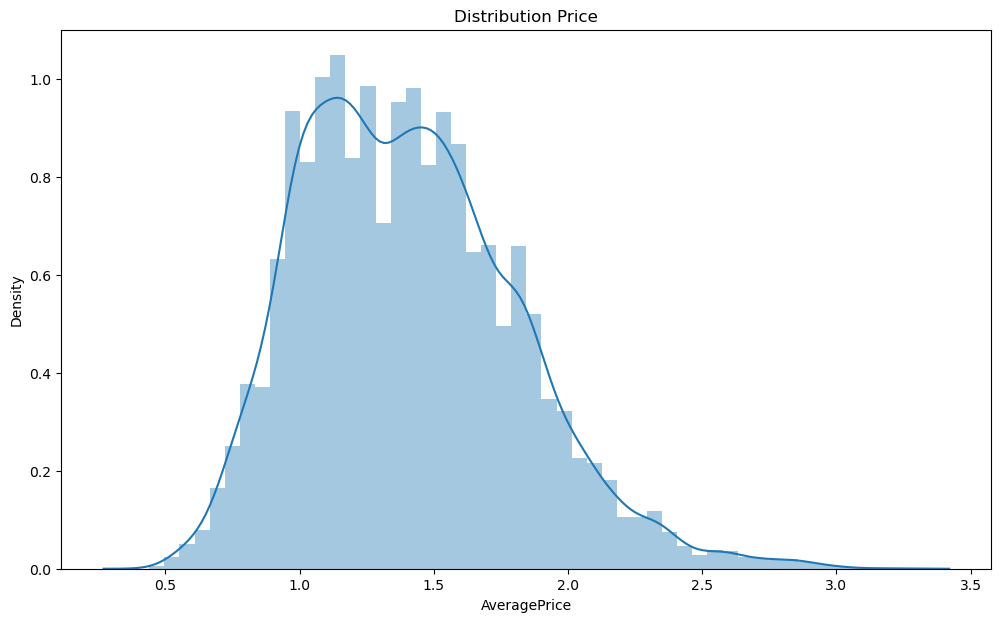

In [16]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(data['AveragePrice'])

**Most of cases Average Price of Avocado Varies between 1.1 and 1.6 USD/Units**

In [17]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [18]:
data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [19]:
print("Percentage difference in price of avocado : ",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avocado :  42.831606217616596 %


<Axes: xlabel='AveragePrice', ylabel='type'>

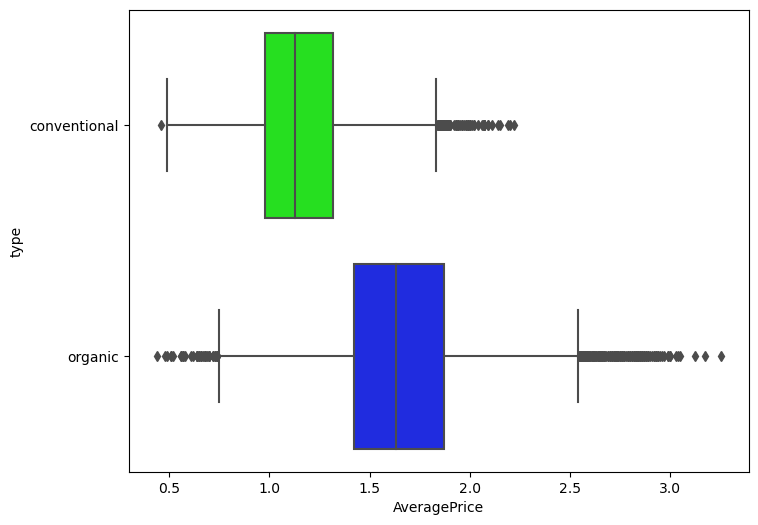

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x = "AveragePrice",data=data,palette='hsv')

**Observation-:**

- Organic avocado is almost 43% more costlier than Conventional avocado
- We can see that Average Price of Organic avocado is higher than Conventional avocado

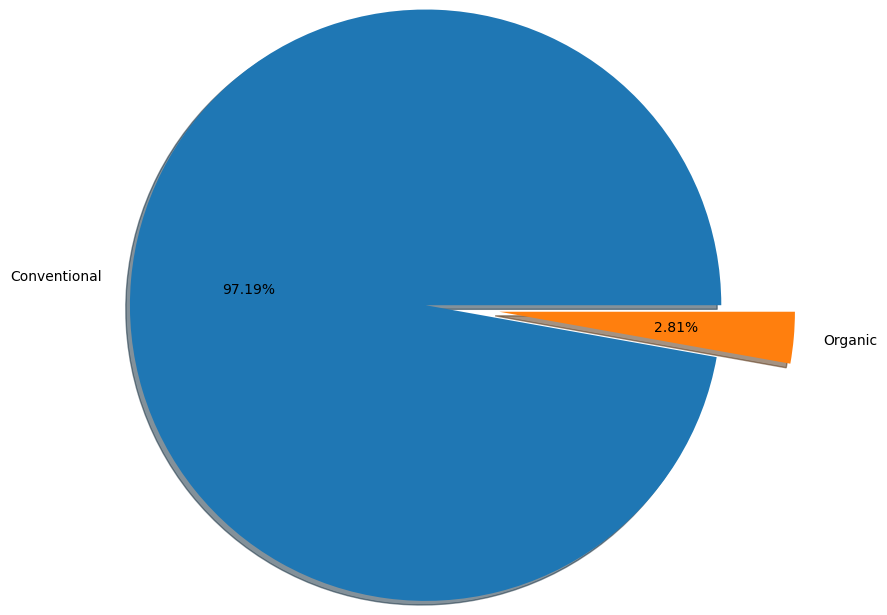

In [21]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(data.groupby('type')['Total Volume'].mean(), labels = labels,radius=2,autopct='%2.2f%%', explode=[0.3,0.2], shadow=True)
plt.show()

In [22]:
data.groupby('type') ['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

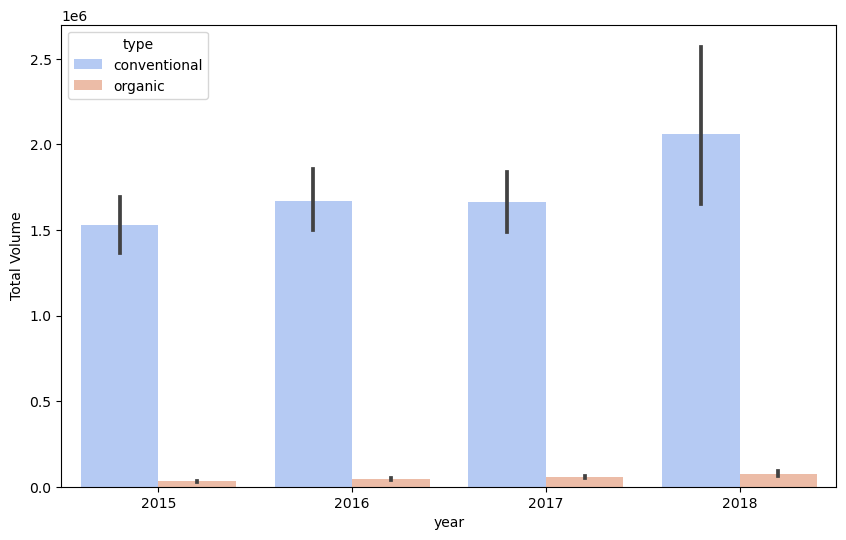

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume', hue = 'type',data = data, palette = 'coolwarm')
plt.show()

**Observation-:**

- The sell of organic avocado is less than 3%.
- Conventional avocado are in more demand.
- Barplot confirms same thing in yearwise sales volume.

**The average price varies over year and season, lets dive to get some insight over it.**

In [24]:
pd.crosstab([data.type,data.year],data.AveragePrice, margins = True).style.background_gradient(cmap = 'summer_r')

In [25]:
data.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

**Observation-:**

- Organic avocado is 40-50% costlier than conventional avocado.
- Avocado got price hike in year 2017 as result of some reason maybe inflation, shortage, more wages.
- Except 2017 each year their is increase in price of Avocado.

**Price Hike Over Time, It's Okay**

In [26]:
data.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

**Observation-:**

- Sales of avocado 2017 more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.
- 30% increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier then conventional type.
- XLarge Bags sales increase rapidly in 2017 compare to 2015.
- People choosing small bags of organic avocado over large.Price factor playing here.

In [27]:
data.sort_values(by=['Date'], inplace=True, ascending=True)

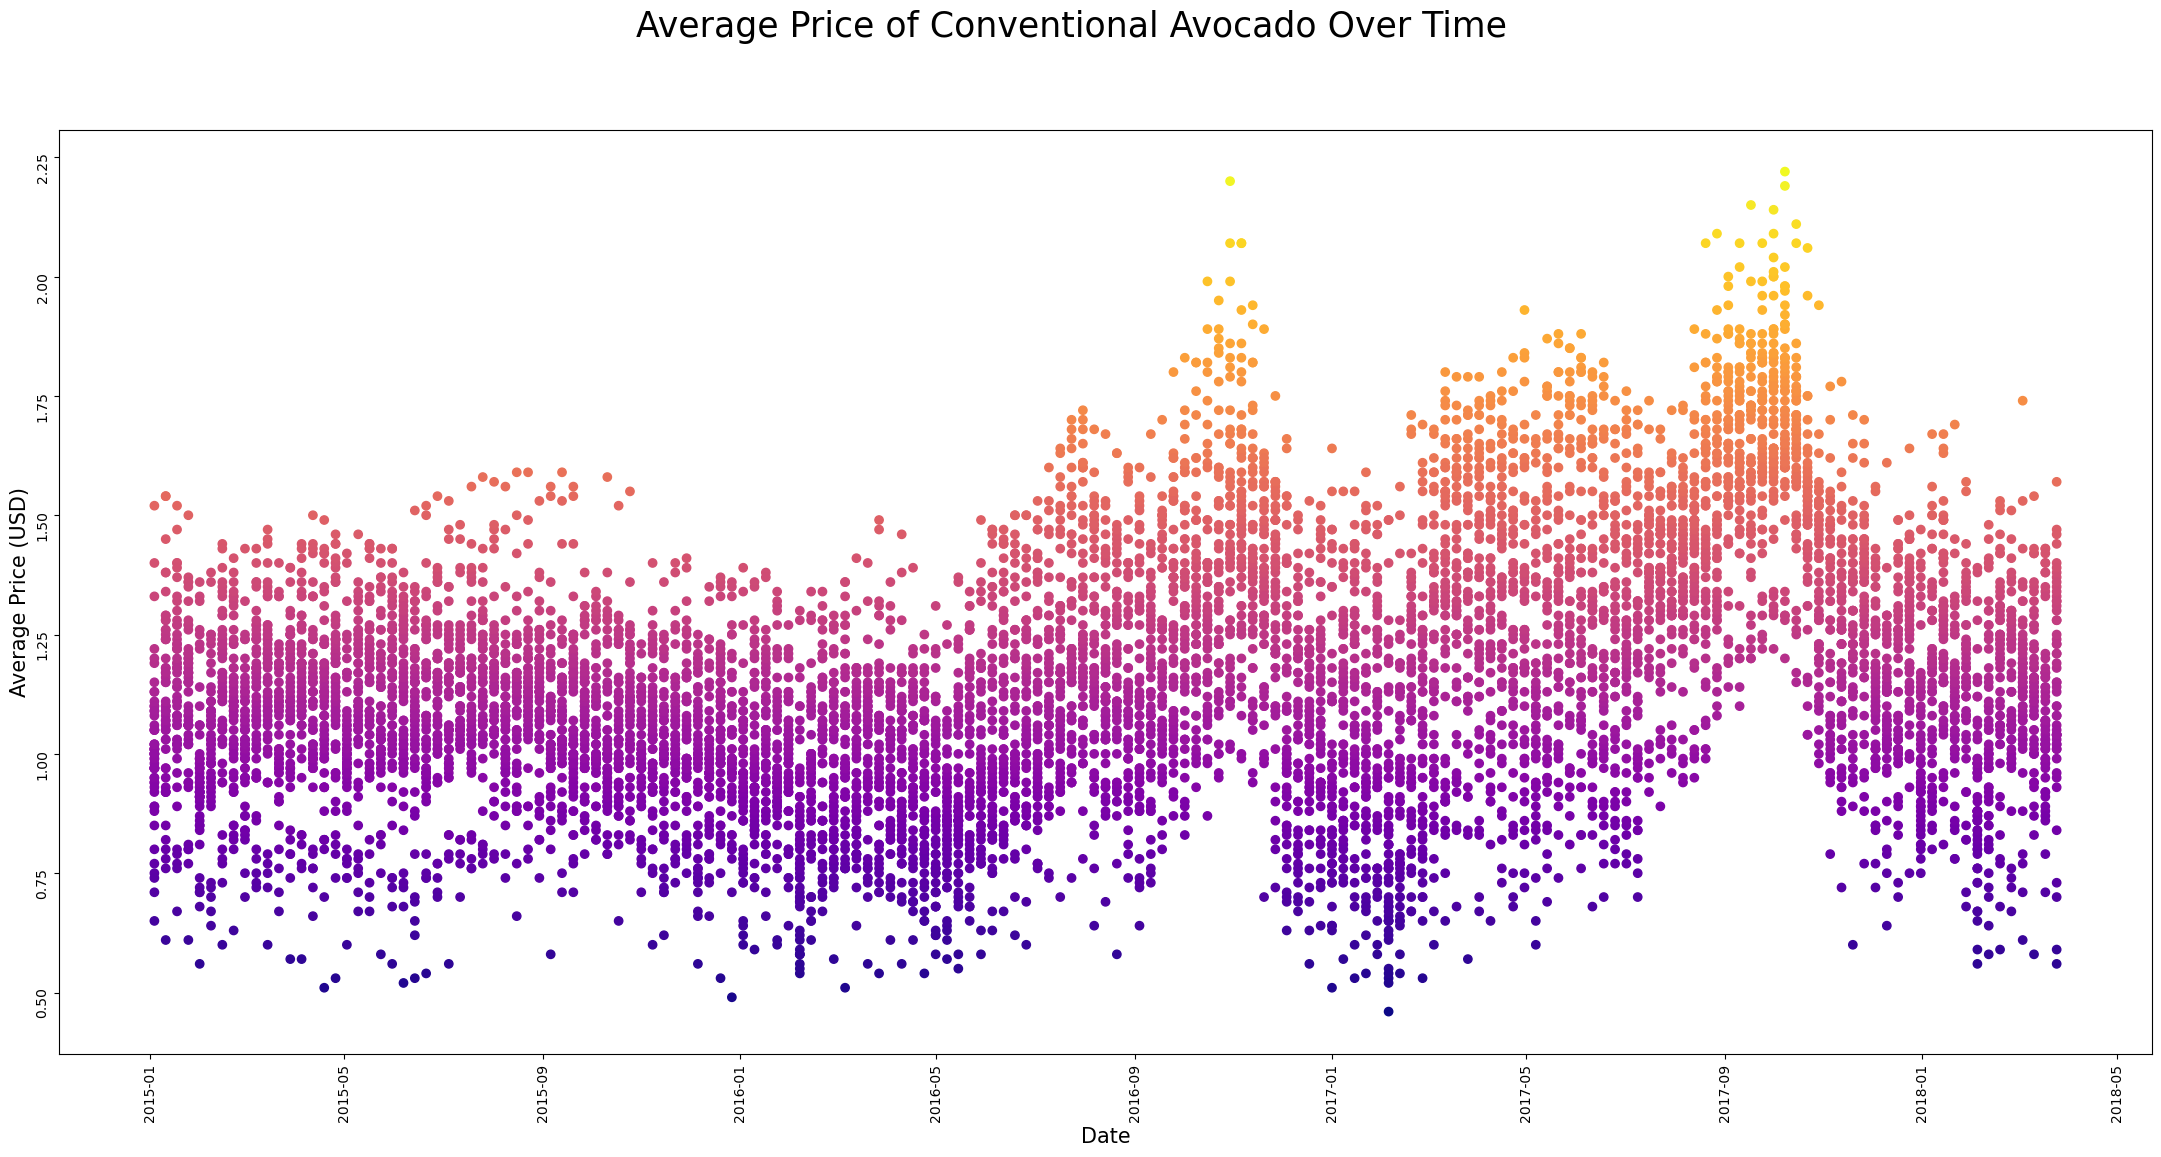

In [28]:
# Average price of Conventional Avocados Over Time

mask = data['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize=(27,12))
fig.suptitle("Average Price of Conventional Avocado Over Time", fontsize=25)
ax = fig.add_subplot(111)

dates = data[mask]['Date'].tolist()
avgPrices = data[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap = 'plasma')
ax.set_xlabel('Date', fontsize =15)
ax.set_ylabel('Average Price (USD)', fontsize =15)
ax.set_xlim()
ax.tick_params(labelrotation = 90)
plt.show()

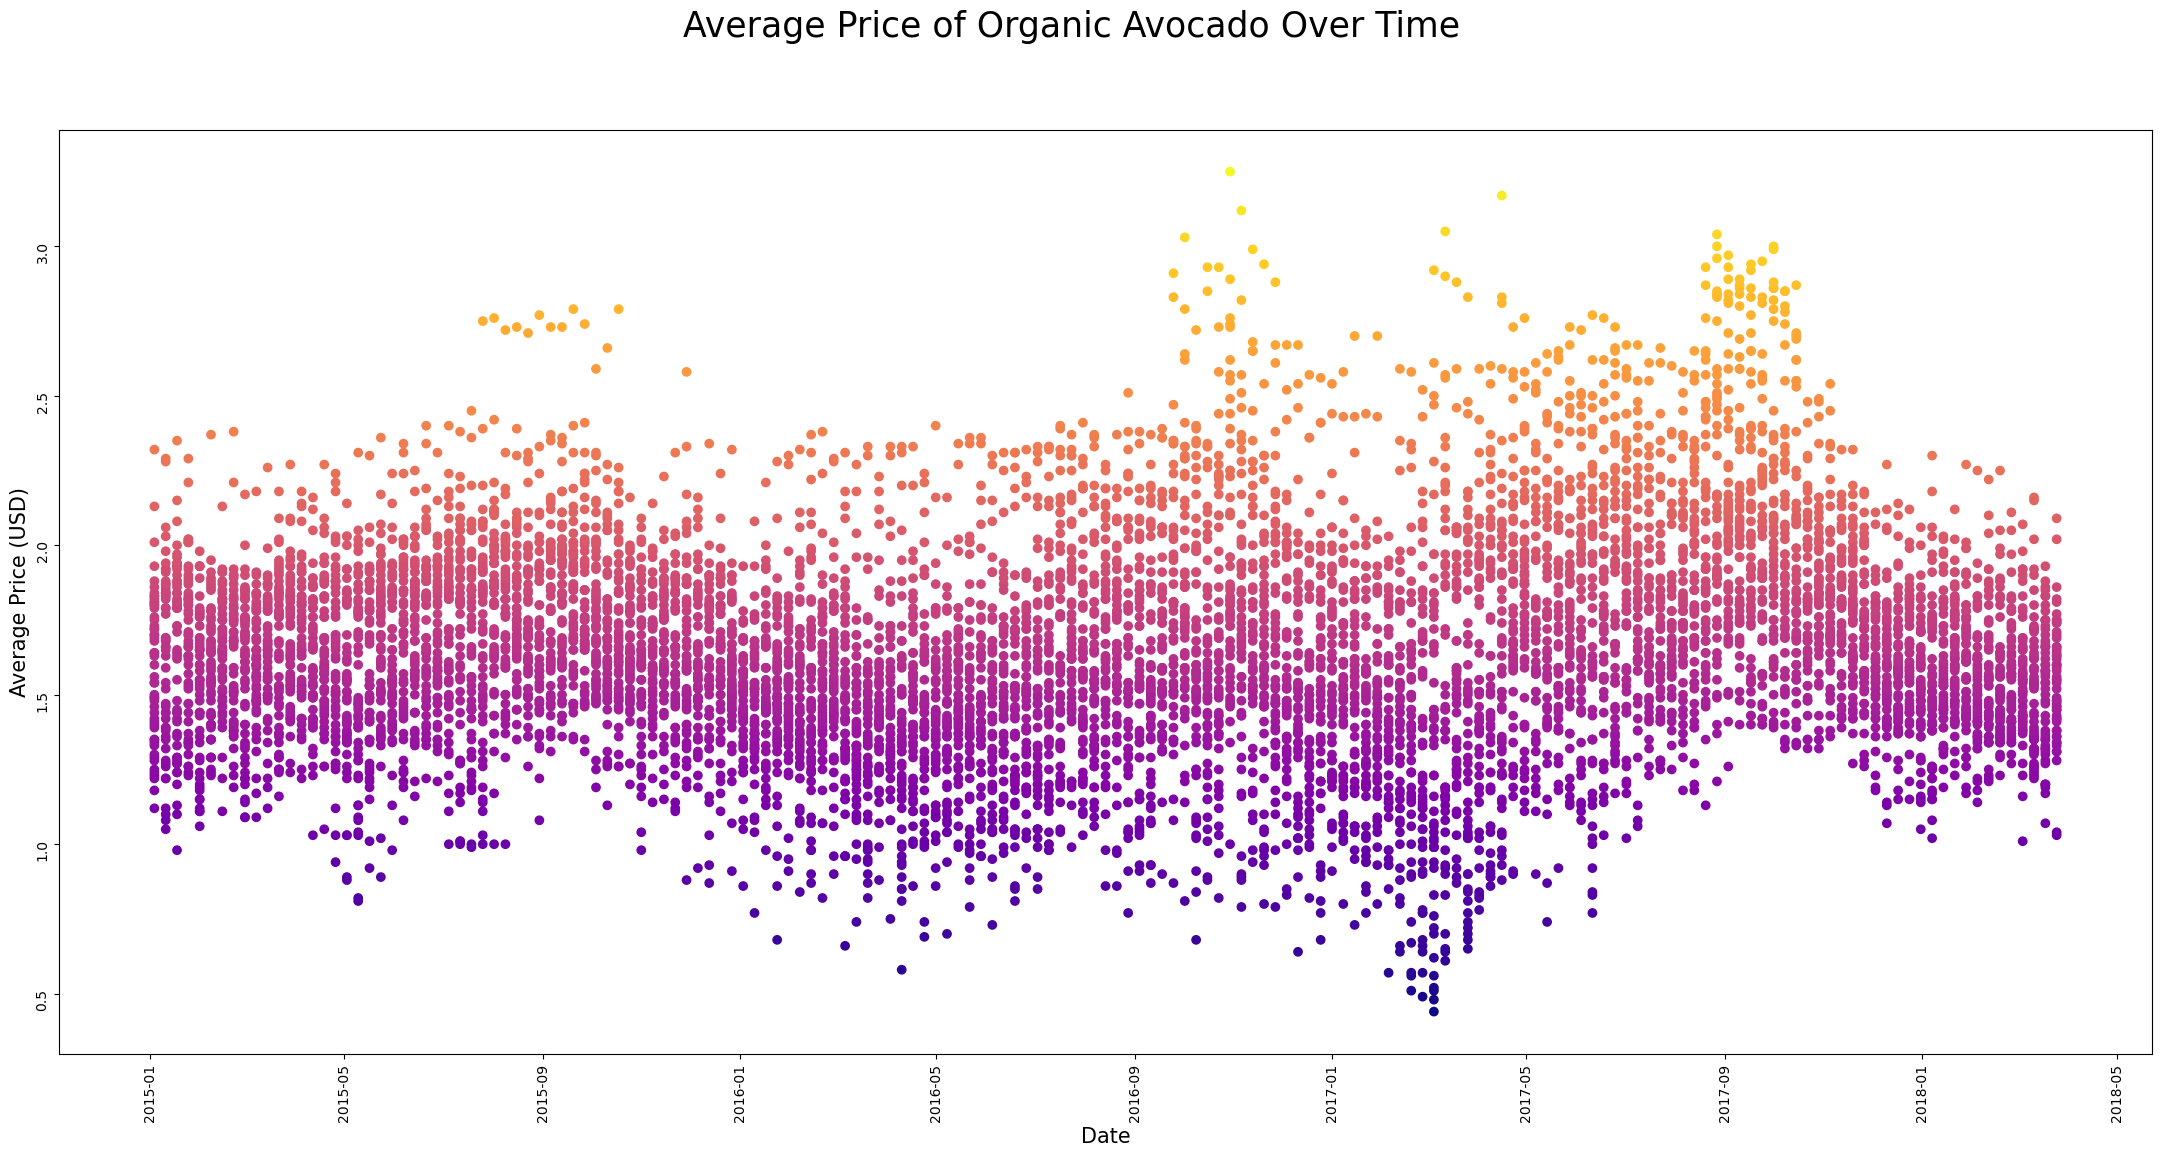

In [29]:
mask = data['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize=(27,12))
fig.suptitle("Average Price of Organic Avocado Over Time", fontsize=25)
ax = fig.add_subplot(111)

dates = data[mask]['Date'].tolist()
avgPrices = data[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap = 'plasma')
ax.set_xlabel('Date', fontsize =15)
ax.set_ylabel('Average Price (USD)', fontsize =15)
ax.set_xlim()
ax.tick_params(labelrotation = 90)
plt.show()

In [30]:
data.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

# EDA

In [31]:
data.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

In [32]:
daa=data.copy()

In [33]:
# create dataframe for numeric features
daa.drop(['Date','type','region','year'],axis = 1, inplace=True)

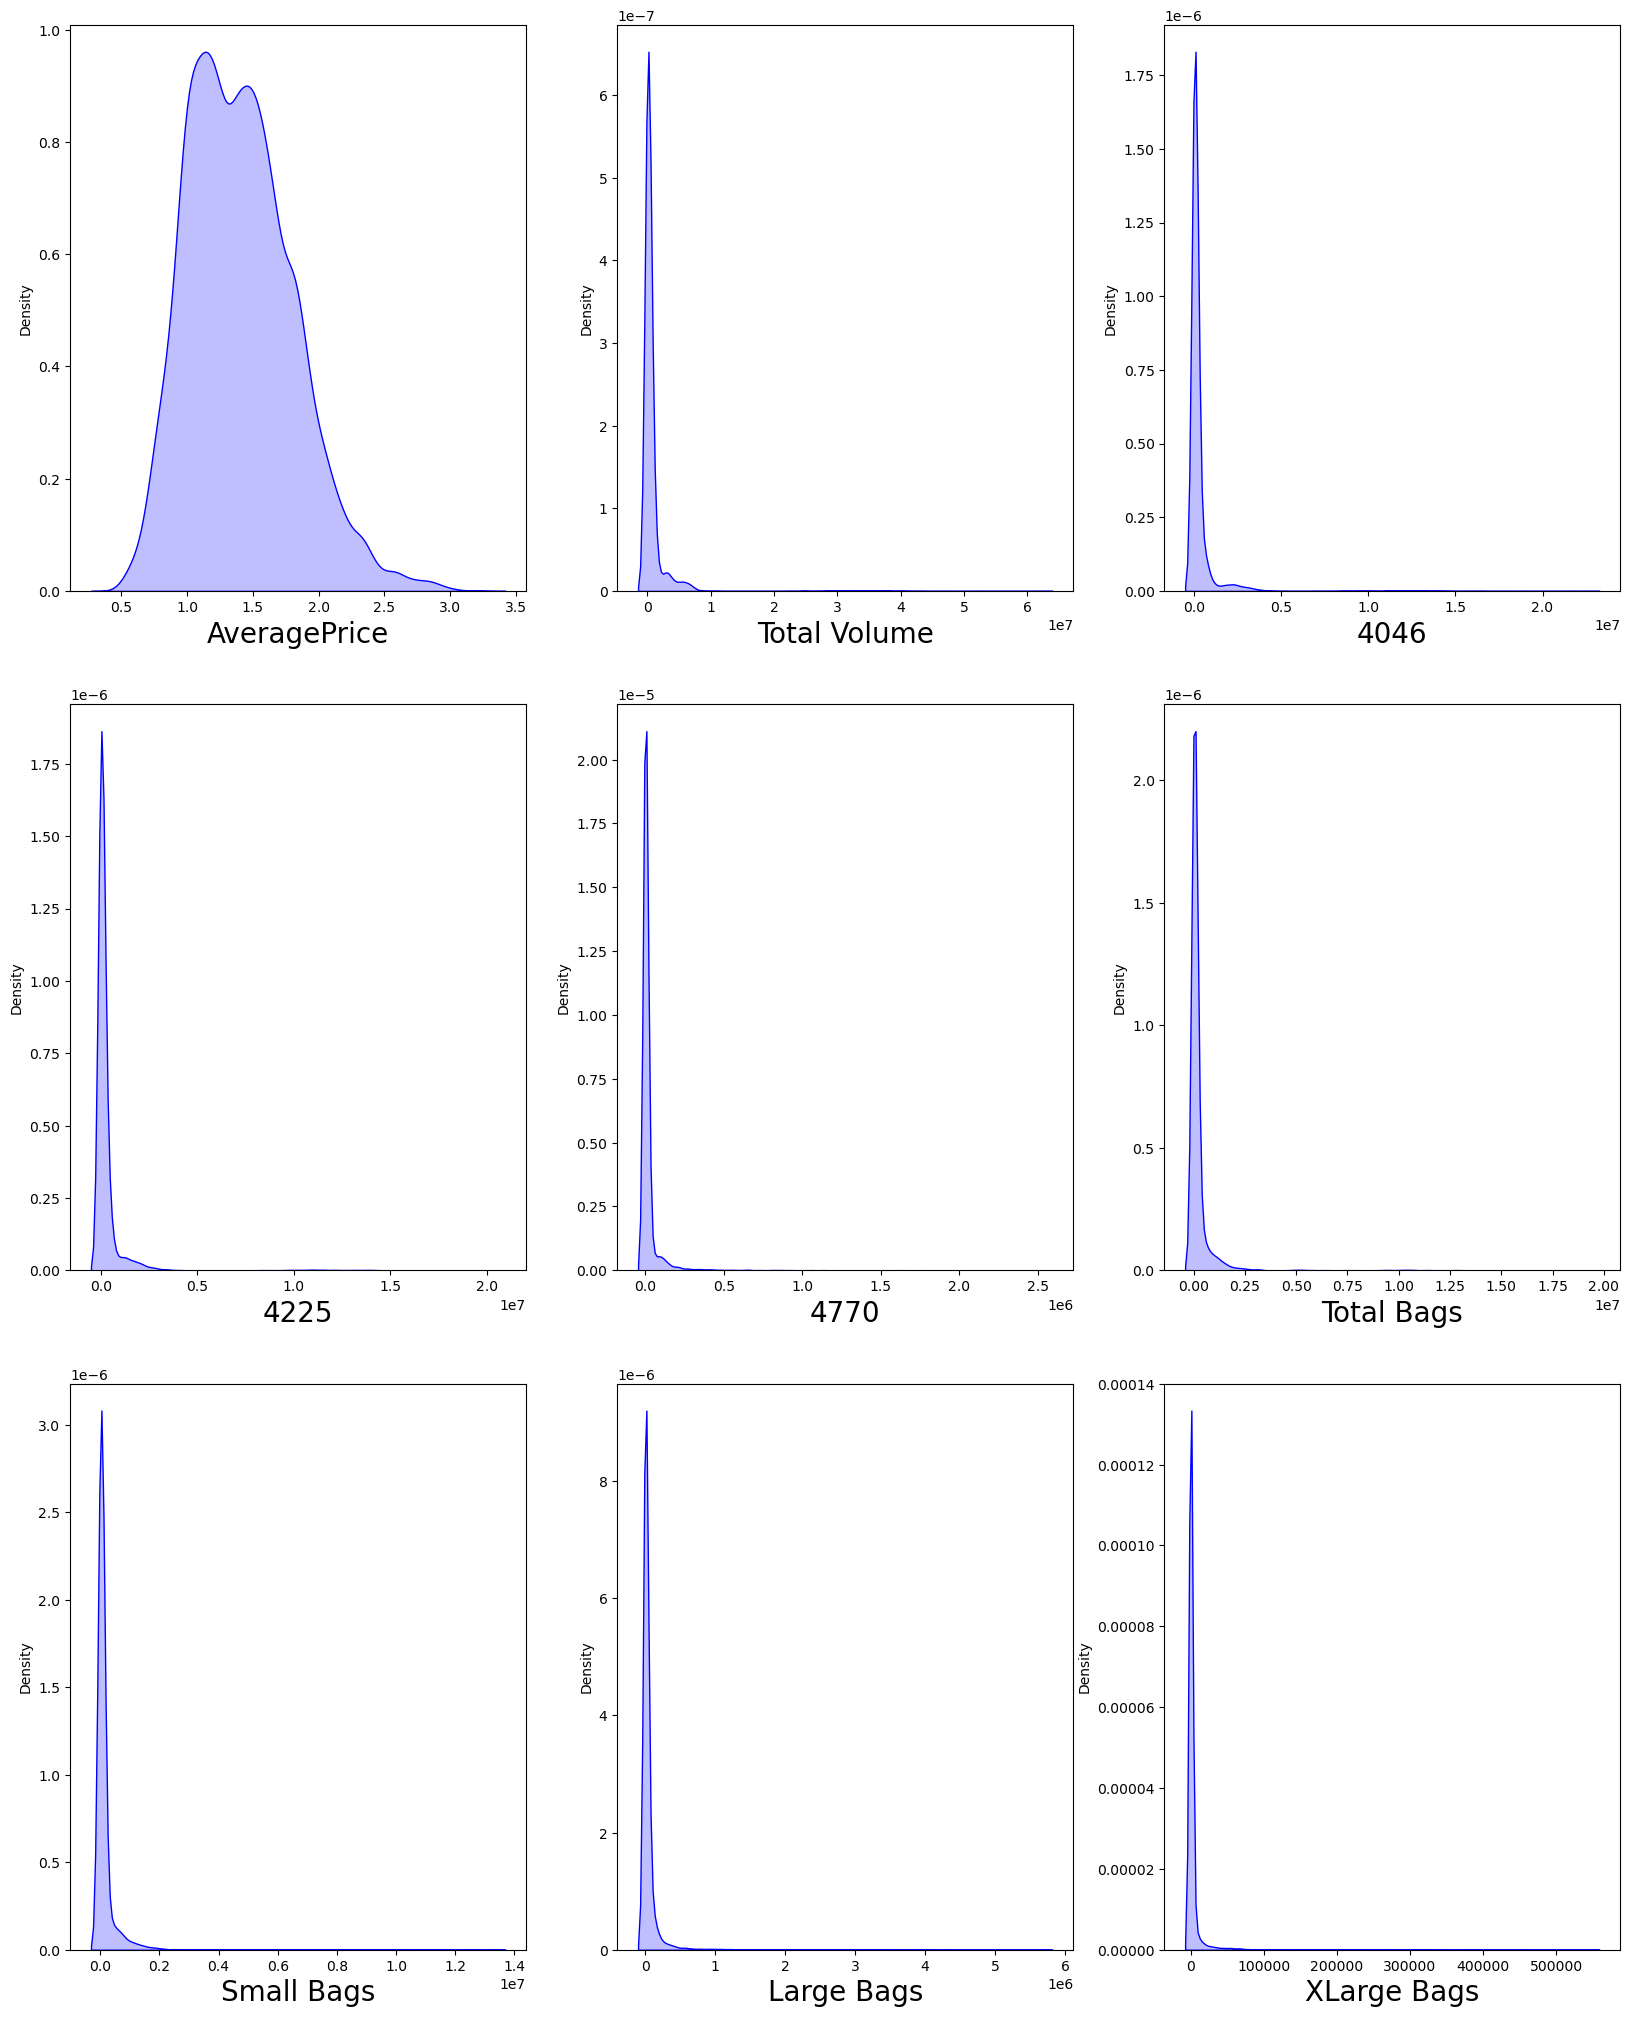

In [34]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in daa:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(daa[column], color = 'b', hist = False, kde_kws={"shade":True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

**Observation-:**

- We can see that skewed data with presense of outlier with sharp peak.
- Most of the plots are right skewed.Having value of mean very small compare to std.deviation and median. This is resulting in sharp high peak.

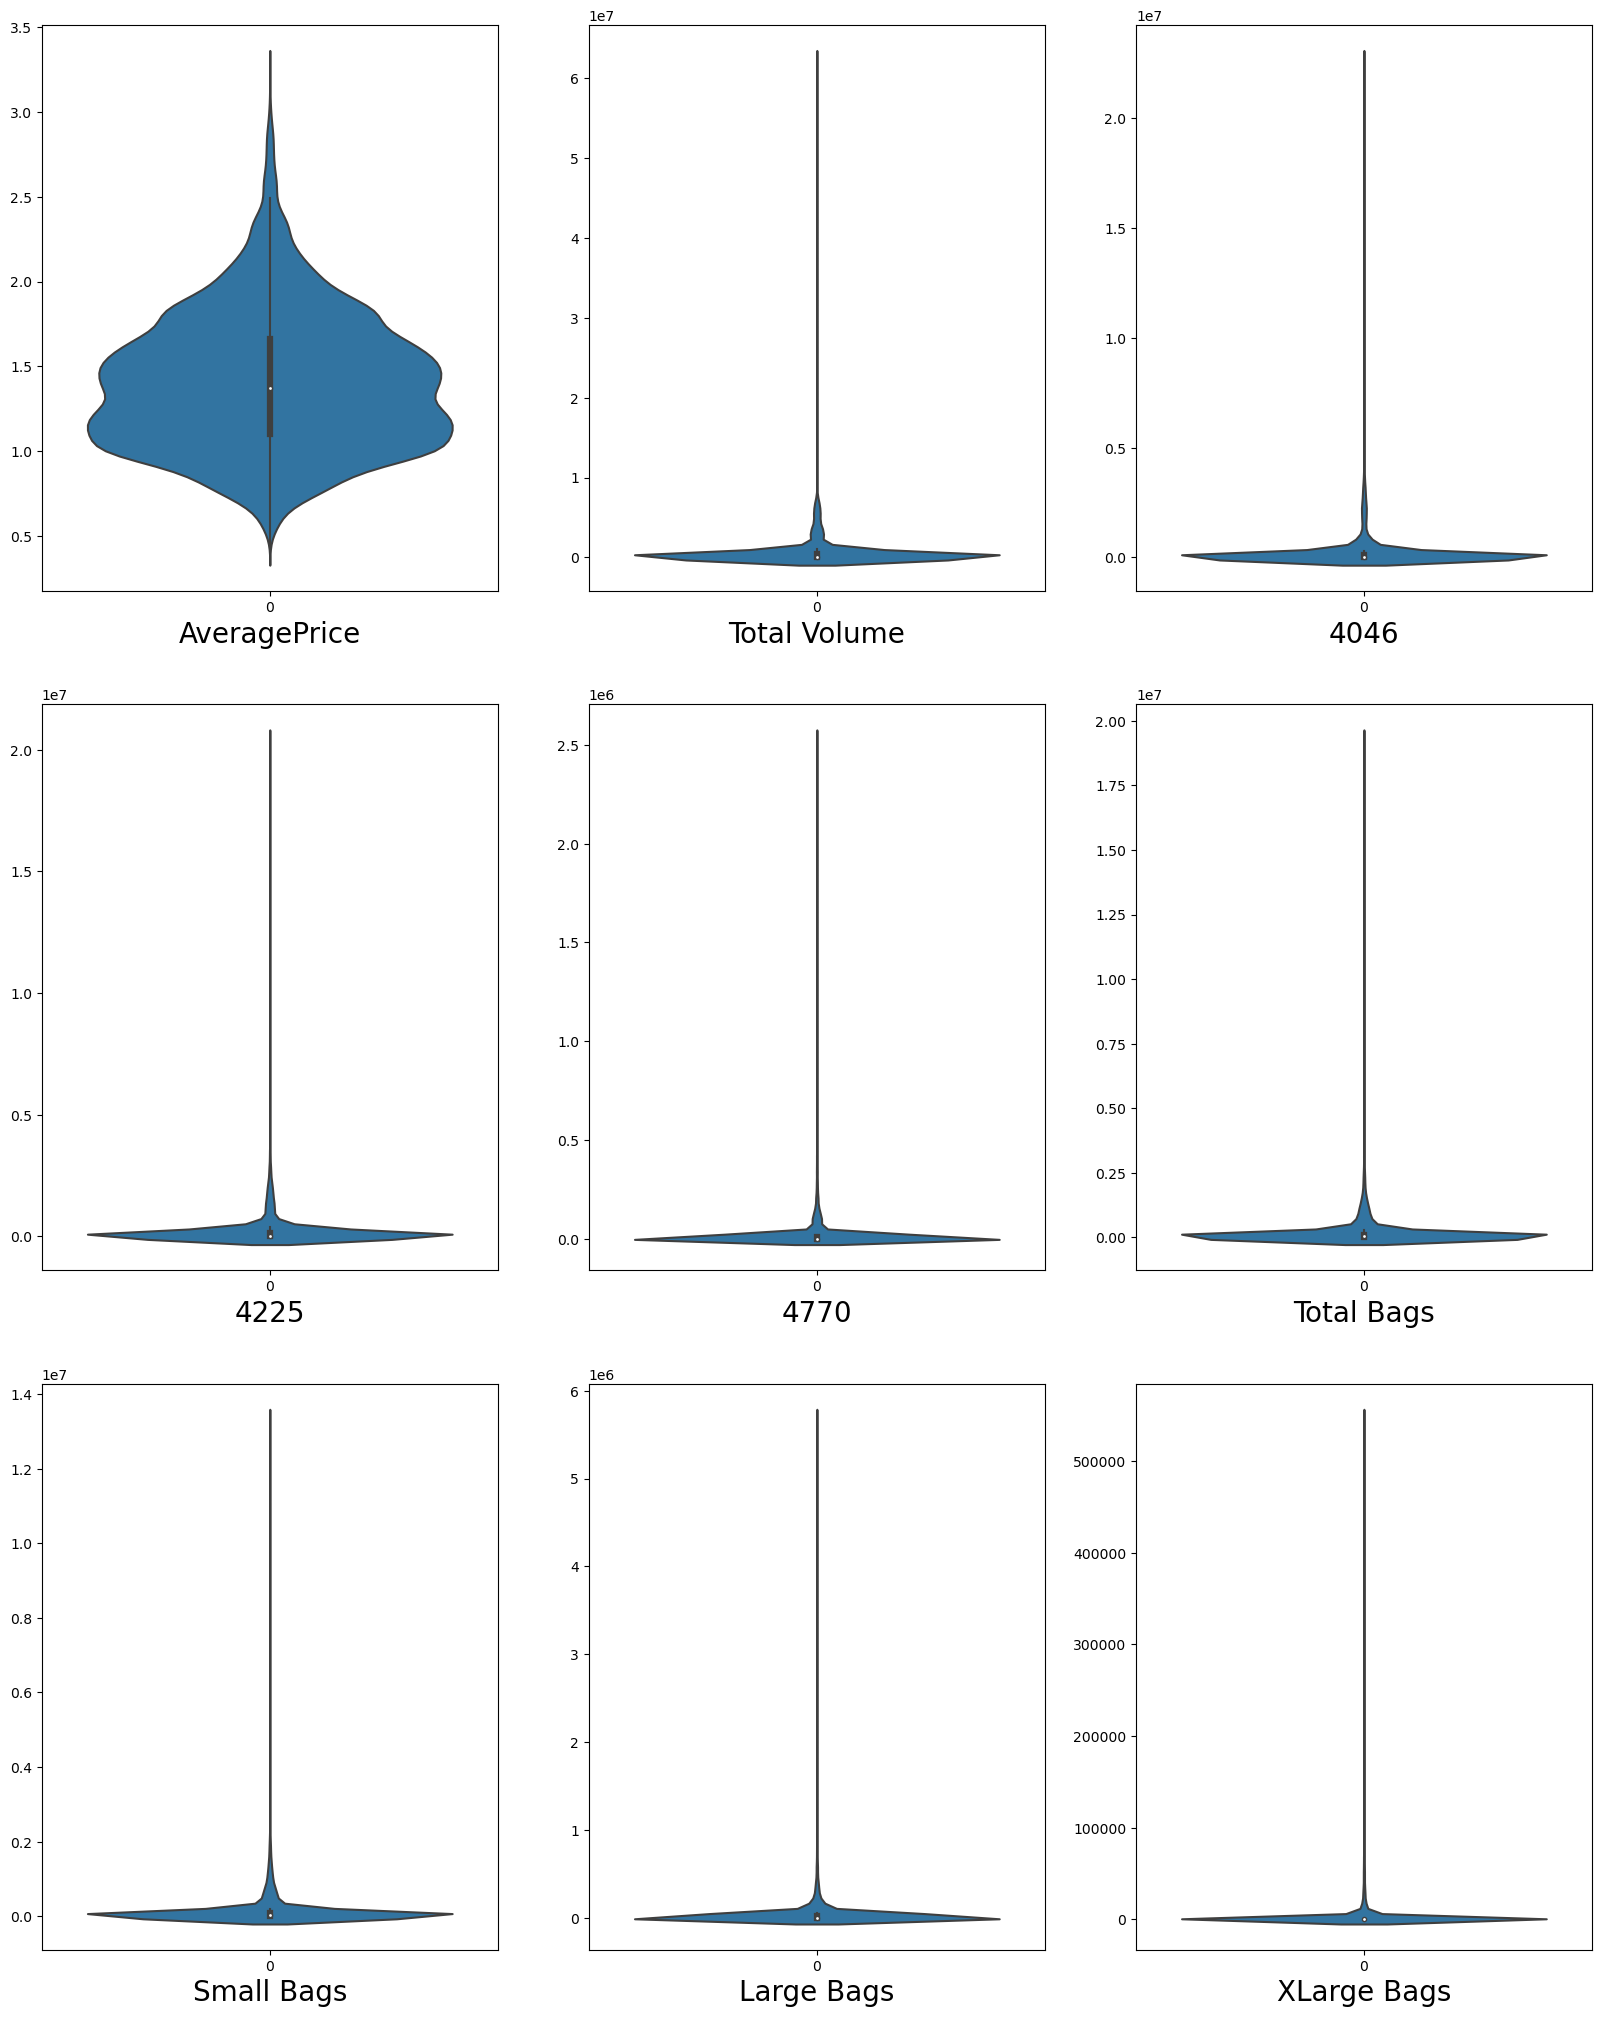

In [35]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in daa:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.violinplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

**Observation-:**

- For majority Average price in range of 1 to 1.5
- Rest of Violinplot show same story as distribution plot.

**Avacado availability and price also vary over the year according to seasonal changes.Let's check the variance Avg prices and sales volumes over each months.**

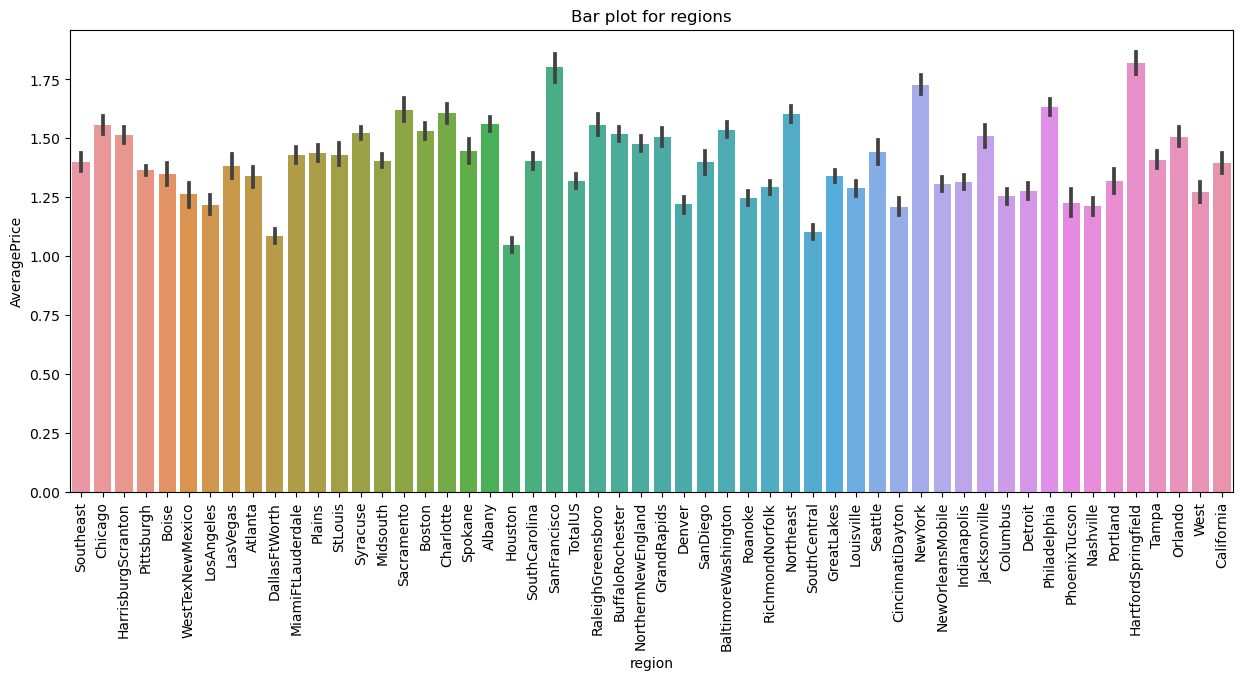

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x=data['region'], y=data['AveragePrice'],data=data)
plt.title("Bar plot for regions")
plt.xticks(rotation = 90)
plt.show()

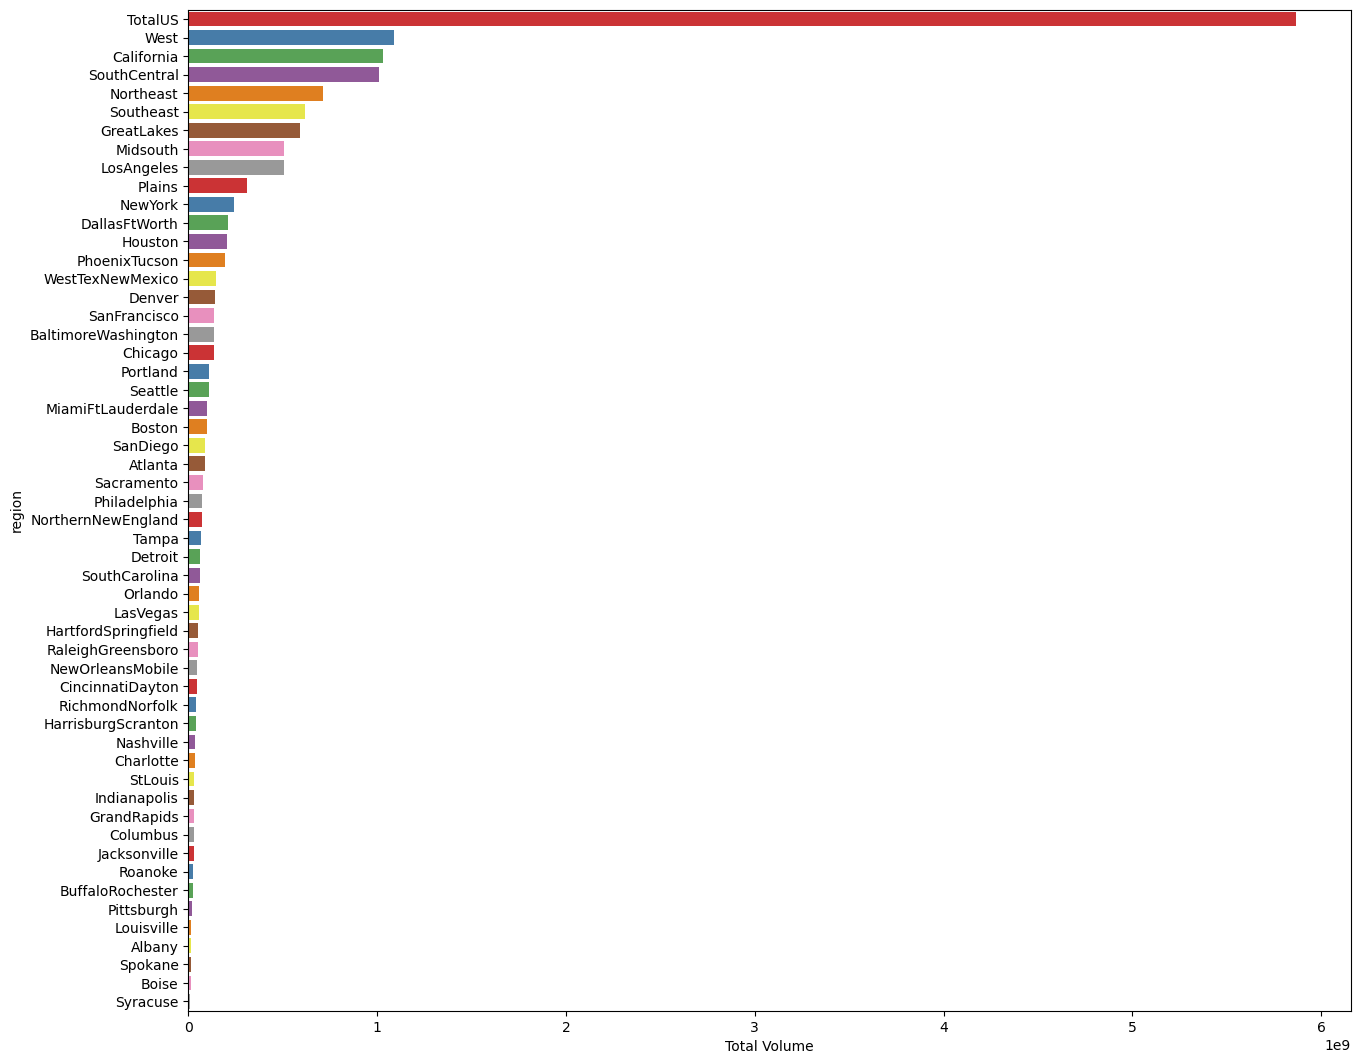

In [37]:
region = data.groupby('region')['Total Volume'].sum().sort_values(ascending = False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y= region["region"], data = data, palette="Set1")
plt.show()

In [38]:
data.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

Total Volume    Total Bags    Small Bags    Large Bags  \
                             mean          mean          mean          mean   
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242

**Observation-:**

- Maximum sales volume is in South Central While Minimum Sales Volume is in Syracuse.
- Maximum Average Price in SanFrancisco and Minimum Average Sale price in Houstan.

In [39]:
data.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

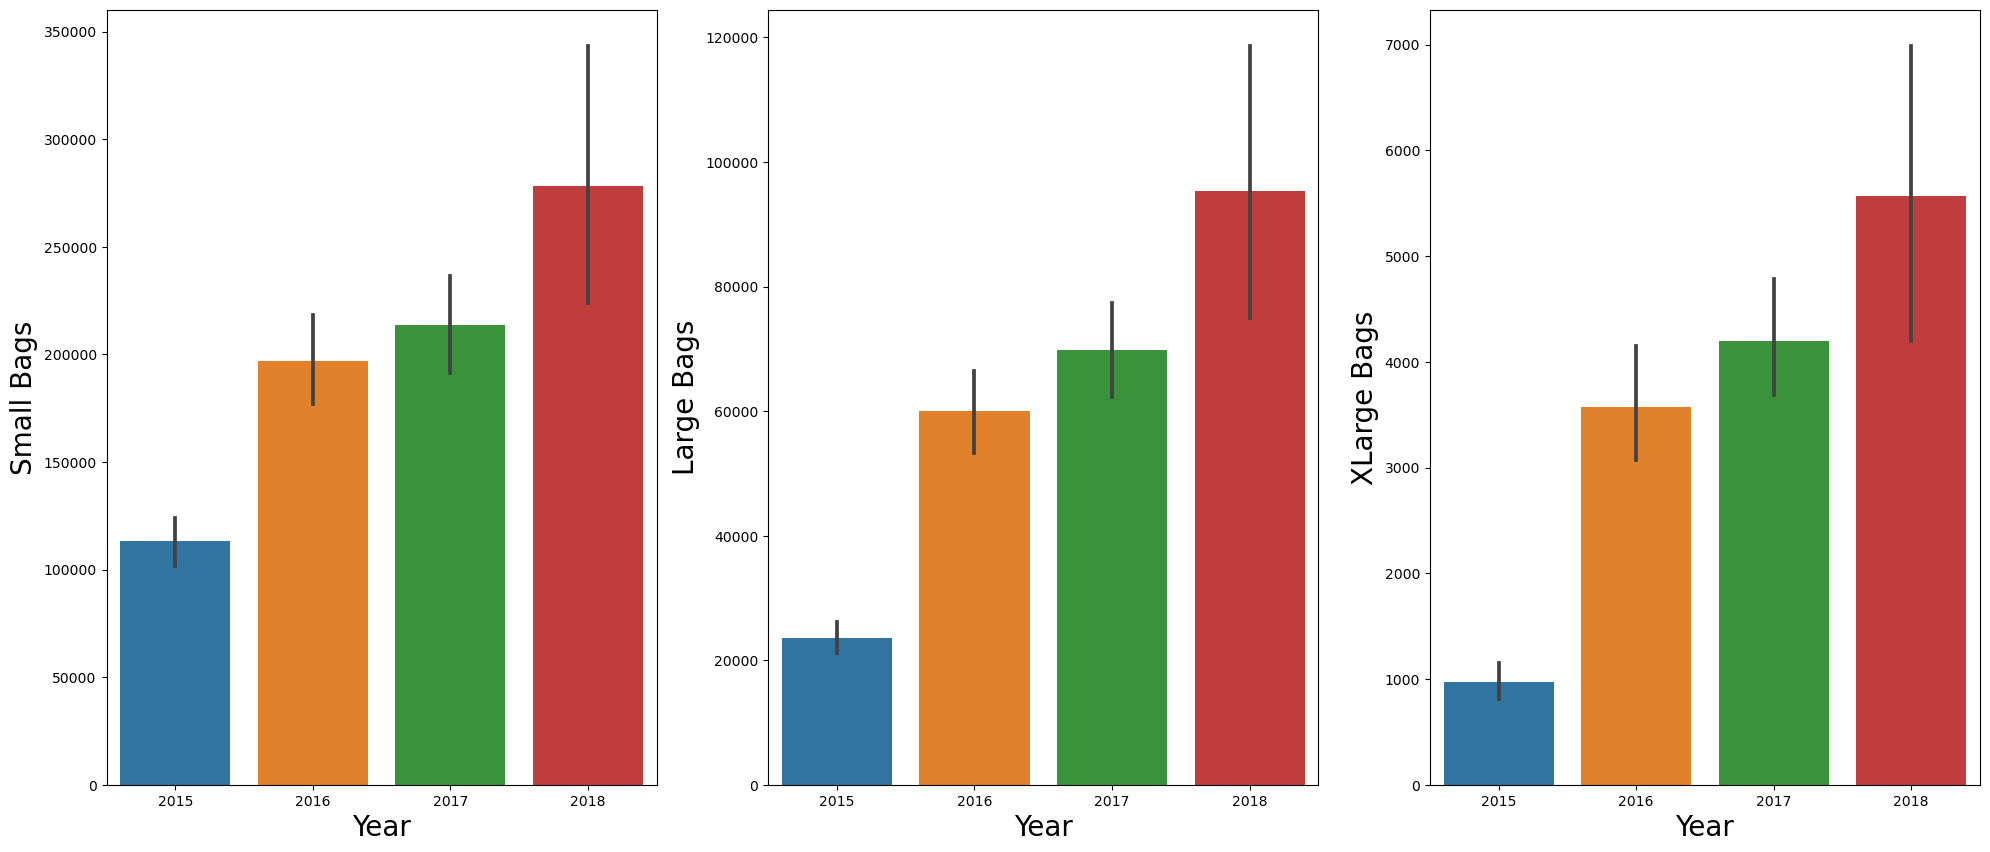

In [40]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
y = data[['Small Bags','Large Bags','XLarge Bags']]
x = data['year']
for col in y:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(x=x,y=col,data=data)
        plt.xlabel('Year', fontsize = 20)
        plt.ylabel(col,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

**Observation-:**

- Sale of all 3 types of bags has grown over the years.
- Most of customers prefer buying small bags over large and Xlarge bags.

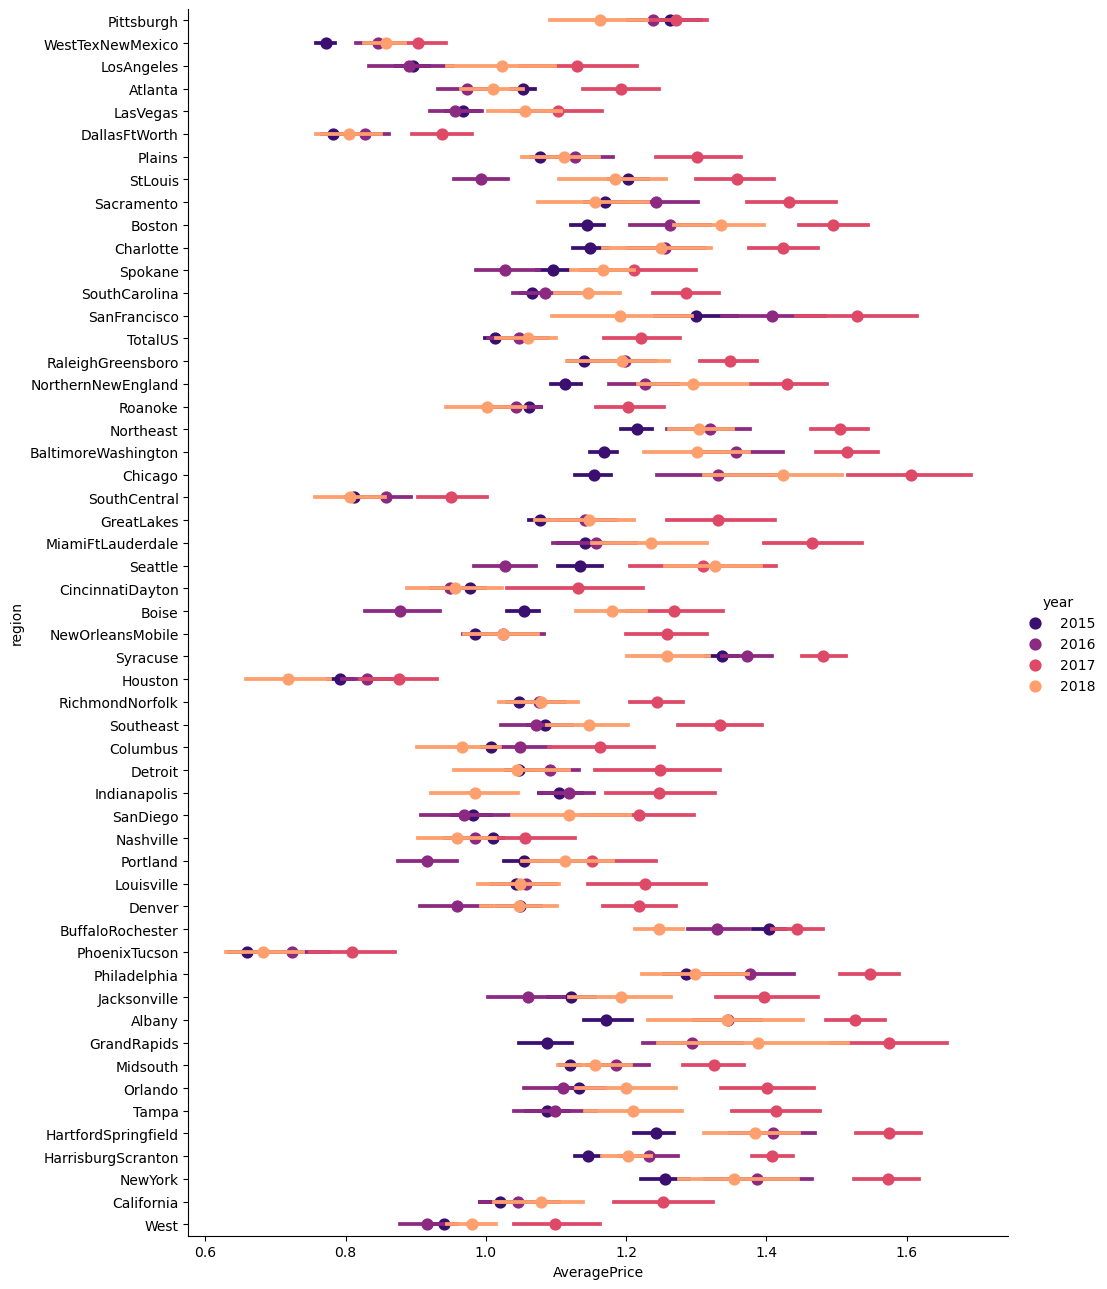

In [41]:
mask = data['type']=='conventional'
g = sns.catplot(x='AveragePrice',y='region', data=data[mask],
                  hue='year',
                  height =13,
                  aspect=0.8,
                  palette='magma',
                  kind='point',
                  join = False,
                  )

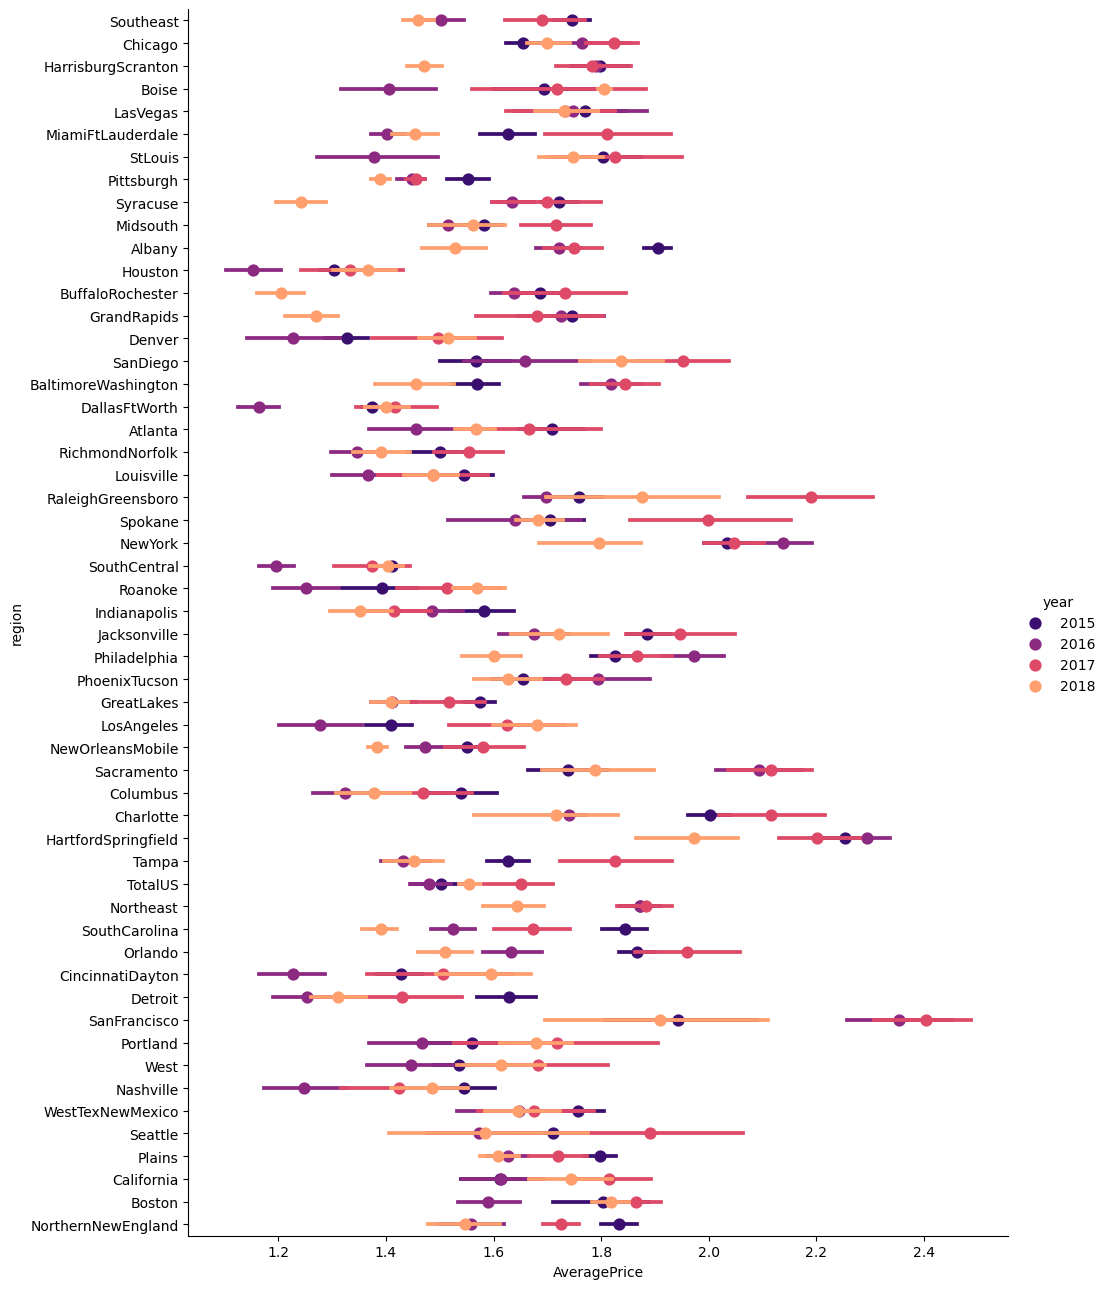

In [42]:
mask = data['type']=='organic'
g = sns.catplot(x='AveragePrice',y='region', data=data[mask],
                  hue='year',
                  height =13,
                  aspect=0.8,
                  palette='magma',
                  kind='point',
                  join = False,
                  )

**The average price of the avocado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.**

# PairPlot

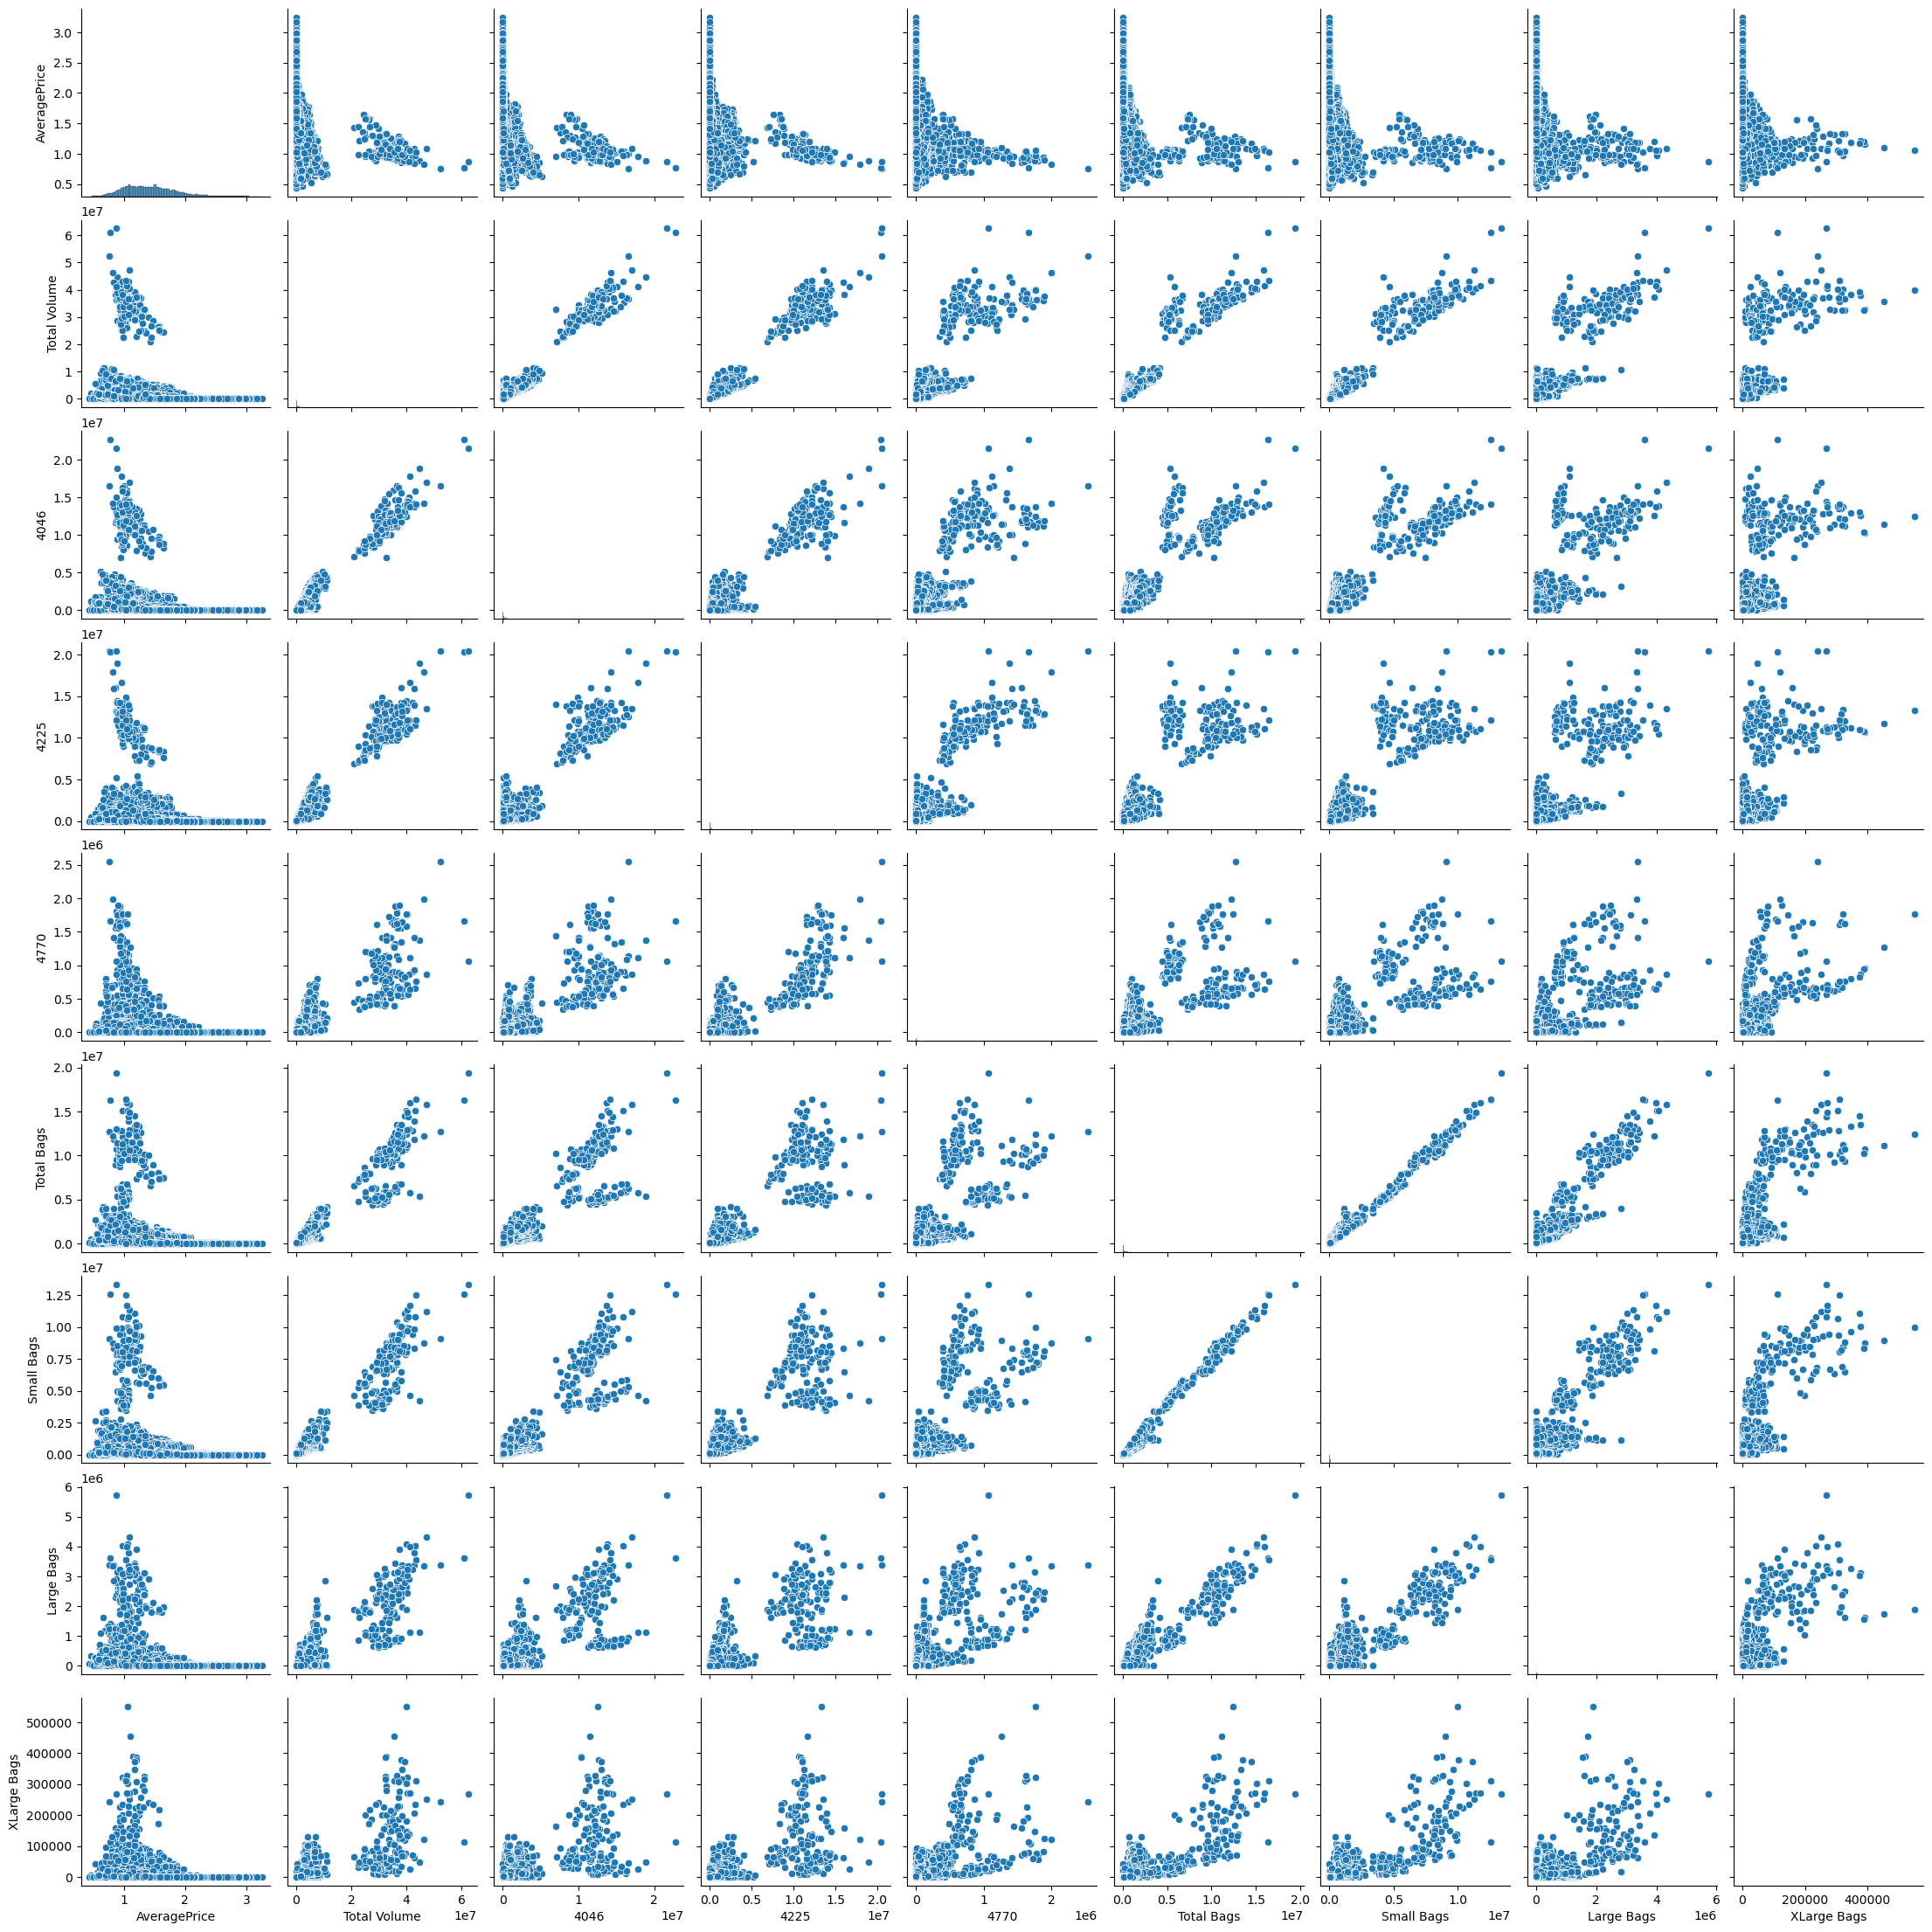

In [43]:
sns.pairplot(daa)

# Encoading Categorical Data

In [44]:
# using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['region']=le.fit_transform(data['region'])
data['type']=le.fit_transform(data['type'])
data.head()


Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
11569    13598.46    13061.10      537.36          0.0     1  2015      46  
9593       905.55      905.55        0.00          0.0     1  2015       8  
10009     2528.08     2528.08        0.00          0.0     1  2015      16  
1819     14925.18    11264.80     3660.38          0.0     0  2015      34  
9333       374.35      186.67      187.68          0.0     1  2015       3

# Outlier detection and removal

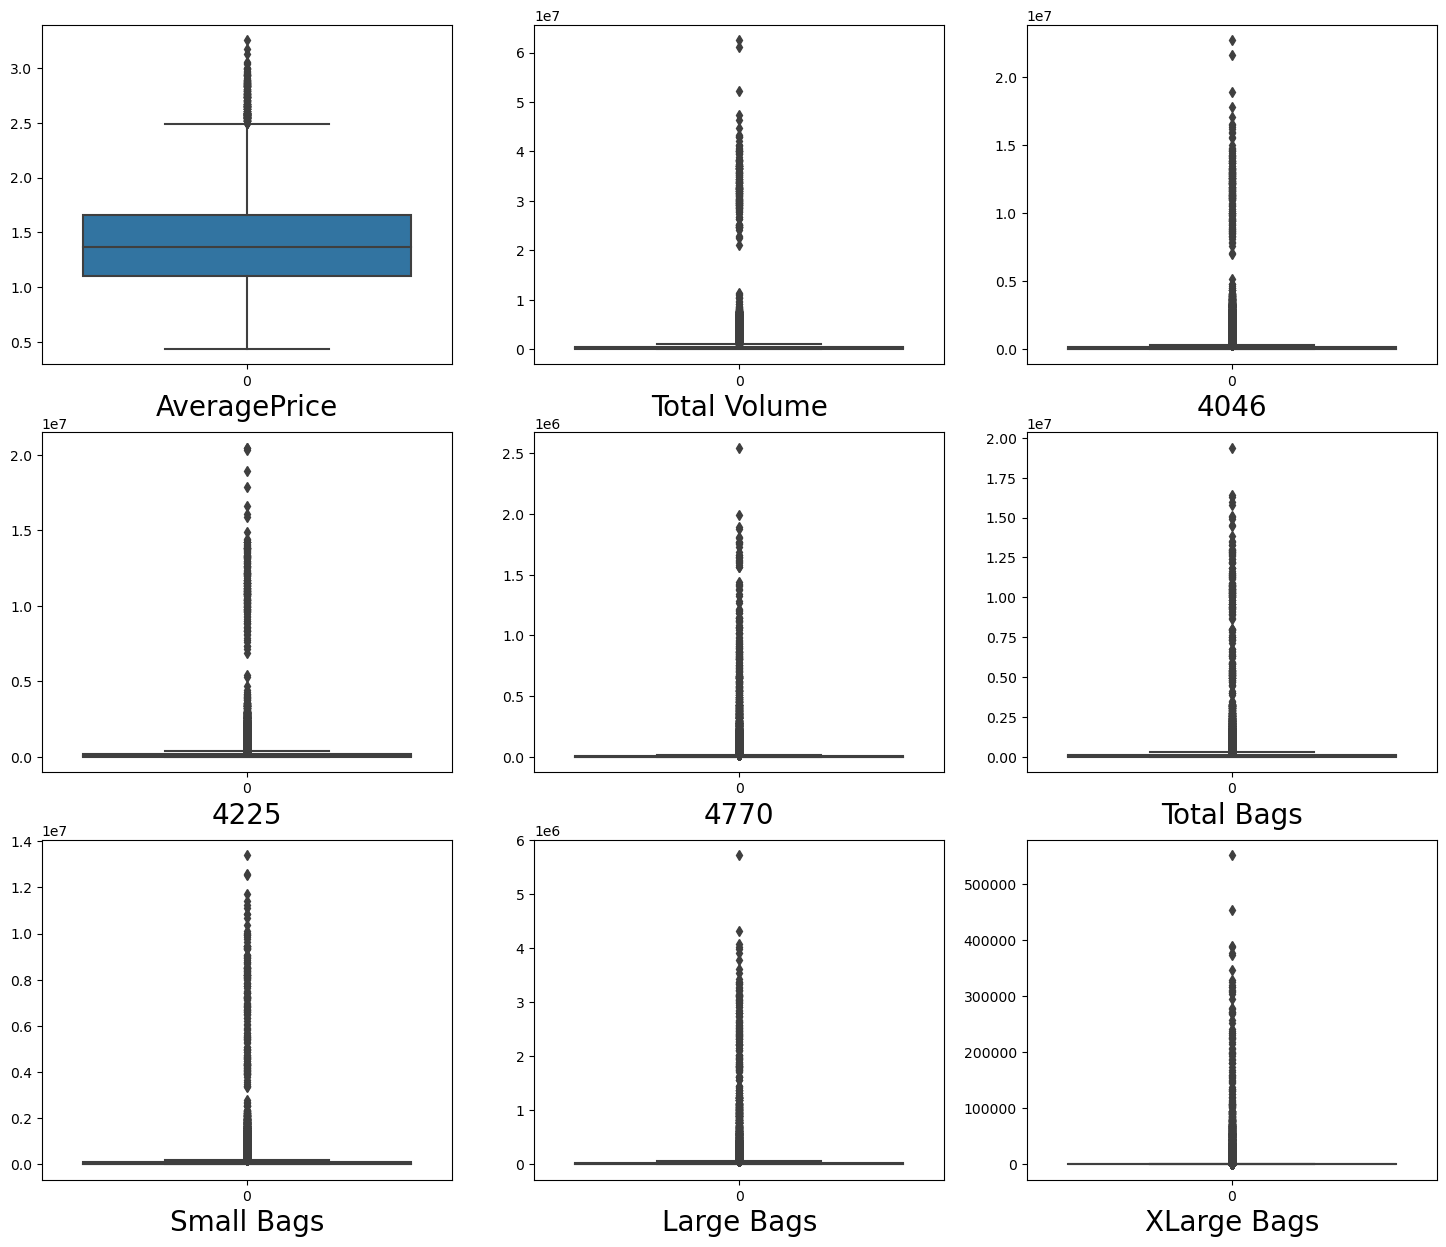

In [45]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber = 1
for column in daa:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

# Correlation

In [46]:
from scipy.stats import zscore
z = np.abs(zscore(daa))
threshold = 3
df = data[(z<3).all(axis = 1)]

In [47]:
print("Shape of dataset after removing outliers :",df.shape)

Shape of dataset after removing outliers : (17651, 13)


In [48]:
print("Percentage Data Loss",((18249-17651)/18249)*100,'%')

Percentage Data Loss 3.276891884486821 %


In [49]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
region           -0.003242      0.076676  0.119067  0.011002 -0.095972   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
year            0.103442    0.086639    0.119543     0.108209  0.003867   
region          0.085892    0.065976    0.127635    -0.044338  0.018409   

                  year    region  
AveragePrice  0.091704 -0.003242  
Total Volume -0.004866  0.076676  
4046         -0.034636  0.119067  
4225         -0.040234  0.011002  
4770         -0.082054 -0.095972  
Total Bags    0.103442  0.085892  
Small Bags    0.086639  0.065976  
Large Bags    0.119543  0.127635  
XLarge Bags   0.108209 -0.044338  
type          0.003867  0.018409  
year          1.000000 -0.004417  
region       -0.004417  1.000000

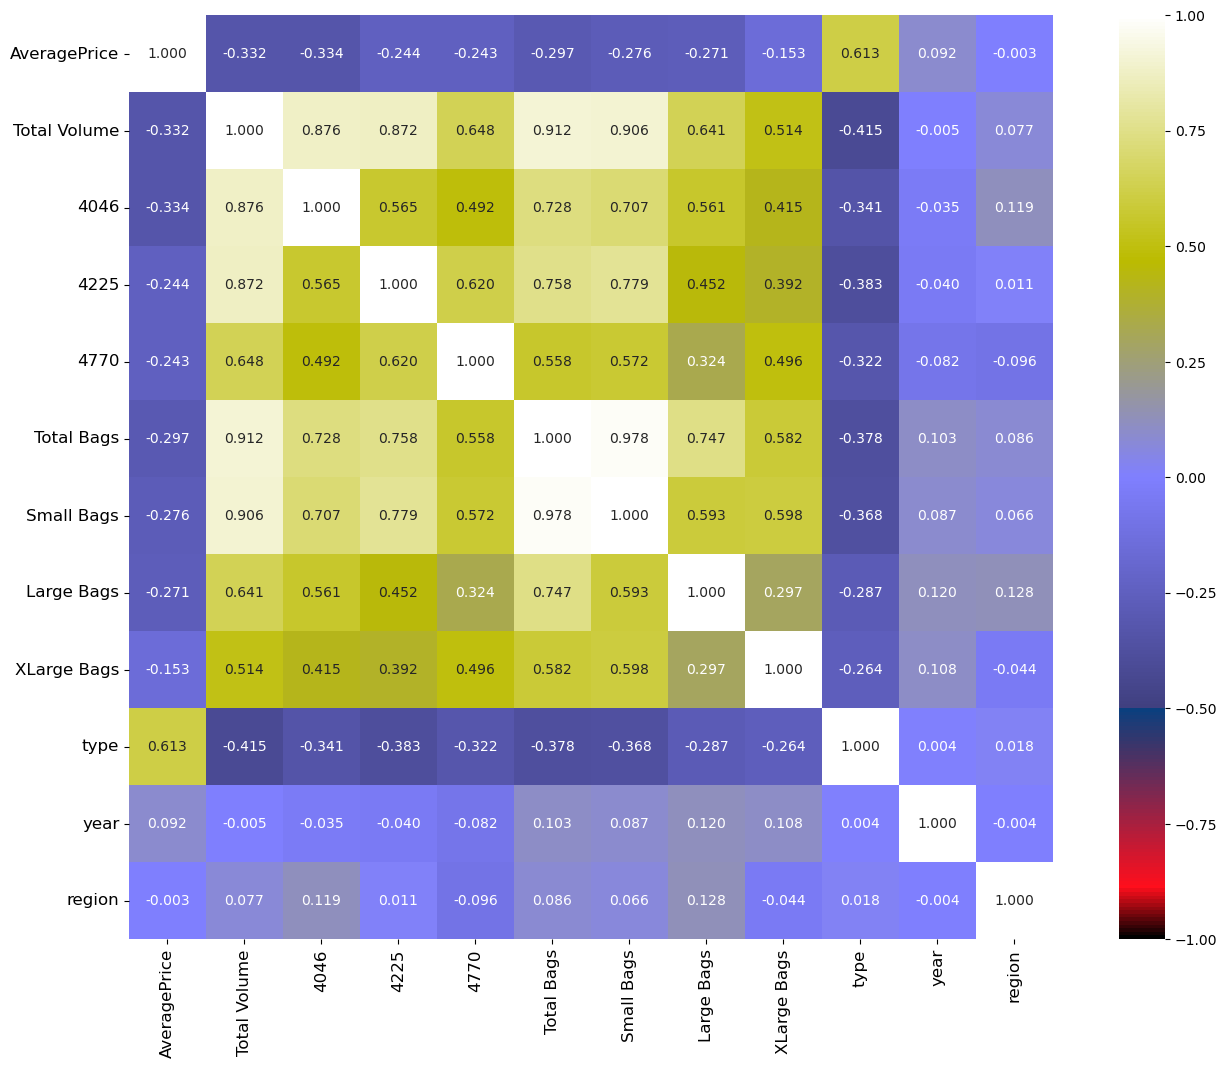

In [50]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),vmin=-1,vmax = 1, annot = True, square = True, fmt='0.3f',
           annot_kws={'size':10},cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

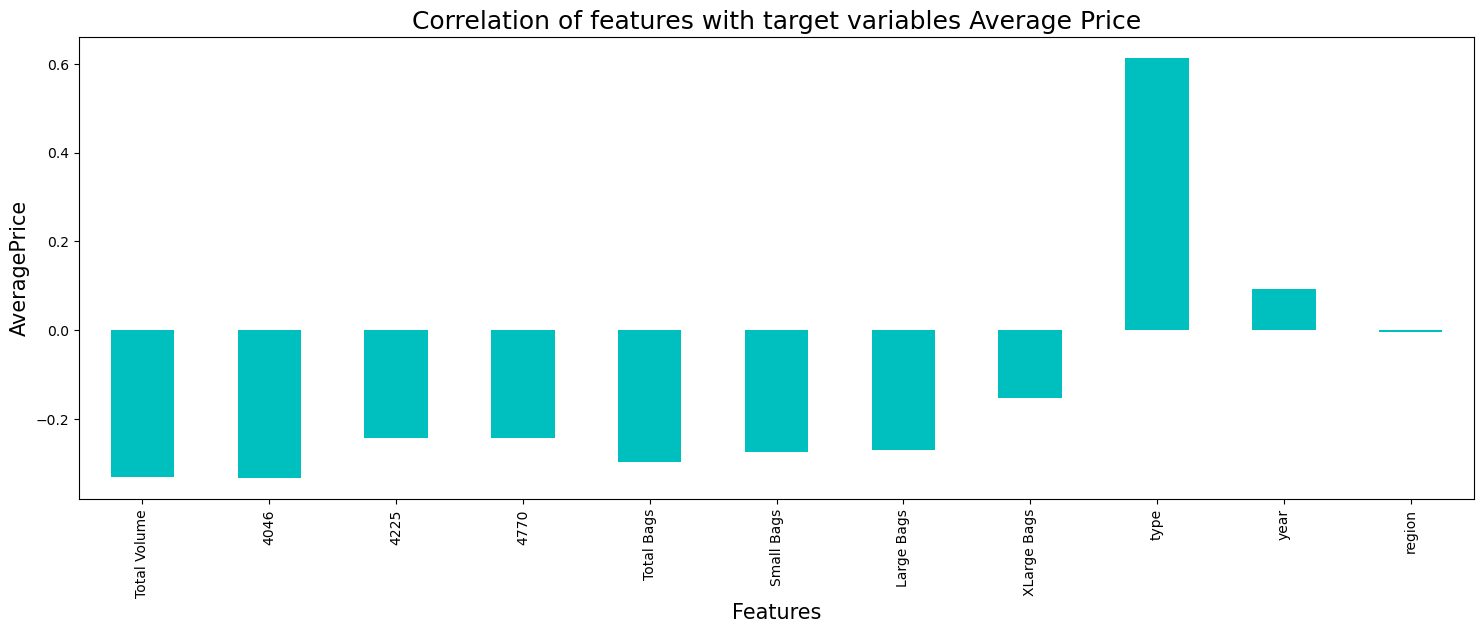

In [51]:
plt.figure(figsize=(18,6))
df.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with target variables Average Price',fontsize=18)
plt.show()

In [52]:
df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
11569    13598.46    13061.10      537.36          0.0     1  2015      46  
9593       905.55      905.55        0.00          0.0     1  2015       8  
10009     2528.08     2528.08        0.00          0.0     1  2015      16  
1819     14925.18    11264.80     3660.38          0.0     0  2015      34  
9333       374.35      186.67      187.68          0.0     1  2015       3

**Almost all features are highly negatively correlated with the target variable and only type, year, have positive correlation with the target.**

**Now , we are going to remove some of columns which are not required for future analysis**

In [53]:
df.drop(columns=['Date',4046,4225,4770,'region','Total Bags'],axis = 1,inplace=True)

# Checking Multicollinearity between features using variance_inflation_factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']=df.columns
vif

VIF      Features
0  23.425802  AveragePrice
1   7.753656  Total Volume
2   7.707137    Small Bags
3   1.968745    Large Bags
4   1.693446   XLarge Bags
5   3.586528          type
6  18.828925          year

# Strategy to Address Multicollinearity-:

- Another way to address Multicollinearity is to scaled  data and then apply pca.

**We will drop year as it is less than 20% correlated with target features and for most of input features correlated with less than 10%**

In [55]:
df.drop(columns=['year'], axis = 1, inplace = True)

# Checking correlations with target variable after removal of multicollinearity

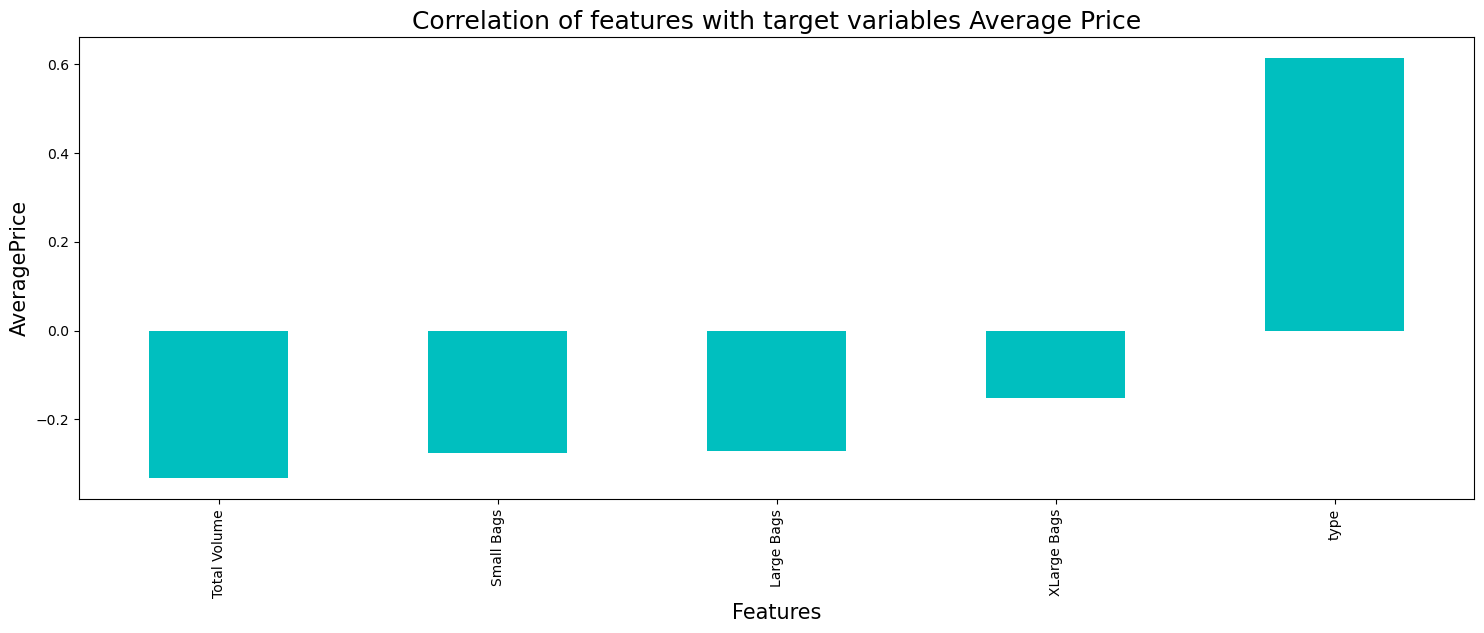

In [56]:
plt.figure(figsize=(18,6))
df.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with target variables Average Price',fontsize=18)
plt.show()

# Skewness of features

In [57]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
dtype: float64

# Transforming skewness through log transform

In [58]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# Standard Scaling

In [59]:
x = df.drop('AveragePrice',axis =1)
y = df['AveragePrice']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Machine Learning Model Building

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (11826, 5)
Training target vector : (11826,)
Test feature matrix size : (5825, 5)
Test target vector size : (5825,)


# Finding Best Random Rate¶

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .25, random_state=557)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.43575284505733847 on Random_state 1


# Linear Regression

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.25,random_state=217)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [1.20258148 1.67413516 1.44323377 ... 1.20048079 1.6217726  1.81576804]


actual price
 3390     0.99
16509    2.19
17063    0.99
14987    1.98
7576     0.73
         ... 
1429     1.01
12164    1.77
762      1.06
17123    1.45
10383    1.50
Name: AveragePrice, Length: 4413, dtype: float64


# Linear Regression Evaluation Matrix

In [65]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

print('R2_Score',r2_score(y_test,y_pred))

Mean absolute error : 0.23409443148755396
Mean Squared error : 0.08688455447919179
Root Mean Squared error 0.2947618606251355


R2_Score 0.41915646308708876


# Cross Validation Score

In [66]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x_scale,y,cv=3)
print("Cross Validation Score",lr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LinearRegression()
CVS Score :  [0.5664986  0.30880477 0.06308735]
Mean CVS Score :  0.3127969058849684
Std Deviation :  0.20553616903866231


# Random Forest

In [67]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)
    
print("Errors of",rf,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of RandomForestRegressor() :
Mean absolute error : 0.1819537729435758
Mean Squared error : 0.060458325424881026
Root Mean Squared error 0.24588274731034104


R2_Score 0.5958219756535679


# Cross Validation Score

In [68]:
cv_score = cross_val_score(rf, x_scale,y,cv=3)
print("Cross Validation Score",rf)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score RandomForestRegressor()
CVS Score :  [0.37254592 0.3520145  0.00056512]
Mean CVS Score :  0.2417085149673093
Std Deviation :  0.17072001997338337


# SVR

In [69]:
svr = SVR()

svr.fit(x_train,y_train)
svr.score(x_train,y_train)
y_pred = svr.predict(x_test)
    
print("Errors of",svr,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of SVR() :
Mean absolute error : 0.2115282610997039
Mean Squared error : 0.07519375165553298
Root Mean Squared error 0.2742147910954713


R2_Score 0.49731221012578375


# Cross Validation Score

In [70]:
cv_score = cross_val_score(rf, x_scale,y,cv=3)
print("Cross Validation Score",rf)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score RandomForestRegressor()
CVS Score :  [ 0.37223783  0.3519293  -0.00421511]
Mean CVS Score :  0.23998400439491144
Std Deviation :  0.17287377843777435


# Decision Tree

In [71]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred = dt.predict(x_test)
    
print("Errors of",dt,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of DecisionTreeRegressor() :
Mean absolute error : 0.23884432358939497
Mean Squared error : 0.11337575345569906
Root Mean Squared error 0.3367131619876168


R2_Score 0.24205661141824808


# Cross Validation Score

In [72]:
cv_score = cross_val_score(dt, x_scale,y,cv=3)
print("Cross Validation Score",dt)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score DecisionTreeRegressor()
CVS Score :  [-0.14343645 -0.0452133  -0.34555408]
Mean CVS Score :  -0.17806794214046873
Std Deviation :  0.12503506256823566


# Ada Boost

In [73]:
ab= AdaBoostRegressor()
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
y_pred = ab.predict(x_test)
    
print("Errors of",ab,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of AdaBoostRegressor() :
Mean absolute error : 0.2391545892529725
Mean Squared error : 0.0867108259822208
Root Mean Squared error 0.29446702019448767


R2_Score 0.4203178786602948


# Cross Validation Score

In [74]:
cv_score = cross_val_score(ab, x_scale,y,cv=3)
print("Cross Validation Score",ab)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score AdaBoostRegressor()
CVS Score :  [0.4554096  0.22326999 0.20151195]
Mean CVS Score :  0.29339717884737987
Std Deviation :  0.11490393267574094


# KNN

In [75]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_pred = ab.predict(x_test)
    
print("Errors of",knn,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of KNeighborsRegressor() :
Mean absolute error : 0.2391545892529725
Mean Squared error : 0.0867108259822208
Root Mean Squared error 0.29446702019448767


R2_Score 0.4203178786602948


In [76]:
cv_score = cross_val_score(knn, x_scale,y,cv=3)
print("Cross Validation Score",knn)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score KNeighborsRegressor()
CVS Score :  [ 0.31407635  0.2966297  -0.05887776]
Mean CVS Score :  0.18394276541689017
Std Deviation :  0.17184770690168077


# Ridge

In [77]:
r = Ridge()

r.fit(x_train,y_train)
r.score(x_train,y_train)
y_pred = r.predict(x_test)
    
print("Errors of",r,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of Ridge() :
Mean absolute error : 0.2340947802809973
Mean Squared error : 0.08688451659546585
Root Mean Squared error 0.2947617963635482


R2_Score 0.4191567163486437


# Cross Validation Score

In [78]:
cv_score = cross_val_score(r, x_scale,y,cv=3)
print("Cross Validation Score",r)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score Ridge()
CVS Score :  [0.56648269 0.30882341 0.06308585]
Mean CVS Score :  0.312797314339774
Std Deviation :  0.2055301089653648


# Lasso

In [79]:
l = Lasso()

l.fit(x_train,y_train)
l.score(x_train,y_train)
y_pred = l.predict(x_test)
    
print("Errors of",l,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of Lasso() :
Mean absolute error : 0.3164111943906751
Mean Squared error : 0.14960565405817808
Root Mean Squared error 0.3867889011569206


R2_Score -0.0001487349069952959


# Cross Validation Score

In [80]:
cv_score = cross_val_score(l, x_scale,y,cv=3)
print("Cross Validation Score",l)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score Lasso()
CVS Score :  [-0.01997569 -0.07250062 -0.1668192 ]
Mean CVS Score :  -0.08643183538429751
Std Deviation :  0.060752574987108406


# Hyper Parameter Tuning: GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [86]:
param = [{'n_estimators':[10,50,100,130],
         'criterion':['squared_error','absolute_error','poisson','friedman_mse'],
         'max_depth':range(2,4,1),
         'max_features':['auto','log2']
         }]

In [87]:
gc = GridSearchCV(RandomForestRegressor(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[C

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'absolute_error',
                                        'poisson', 'friedman_mse'],
                          'max_depth': range(2, 4),
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [10, 50, 100, 130]}],
             verbose=5)

In [88]:
gc.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 100}

# Final Model

In [90]:
final = RandomForestRegressor(n_estimators = 100,criterion= 'friedman_mse', max_depth = 3, max_features = 'log2')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Mean absolute error : 0.23127290308549084
Mean Squared error : 0.08461588731371494
Root Mean Squared error 0.2908881010177538
R2_Score 0.4343230328919595


# Predection the final model

True Values Vs Predicted Value Plot :


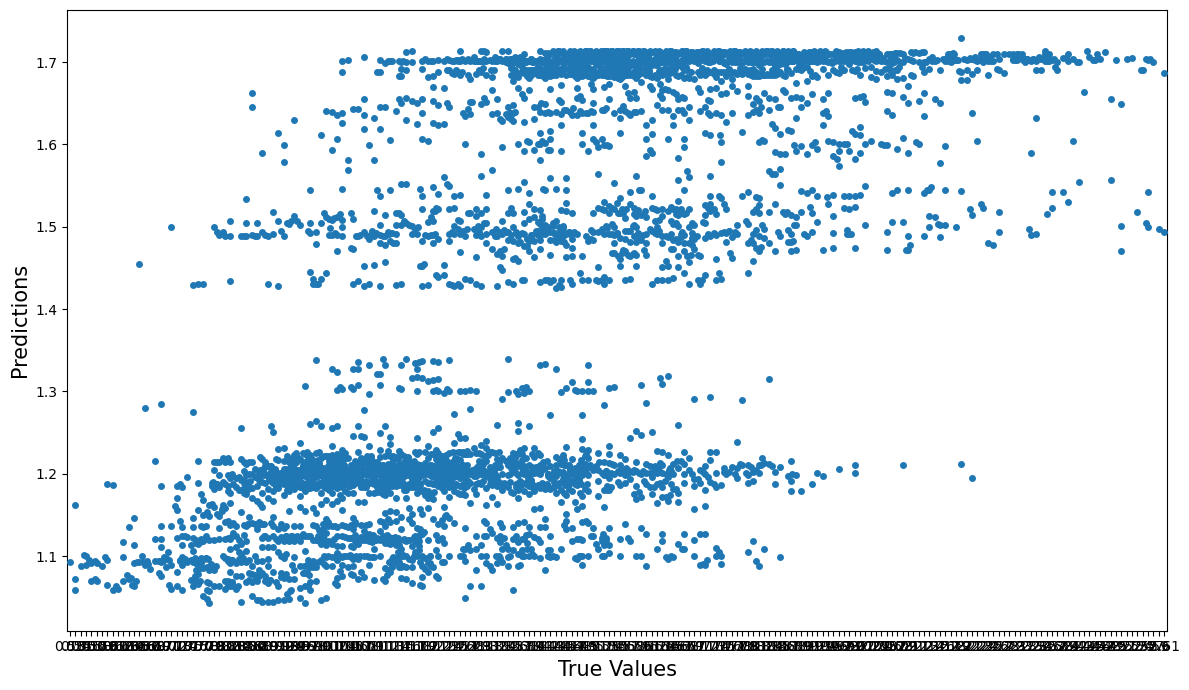

In [94]:
plt.figure(figsize=(12,7))
y_Pred = final.predict(x_test)
sns.swarmplot(x=y_test.round(2),y= y_pred)
print("True Values Vs Predicted Value Plot :")
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.tight_layout()

# Saving Model

In [95]:
import joblib
joblib.dump(final,"Avocado_project")

['Avocado_project']